In [ ]:
!pip install lifelines
!pip install pycox
!pip install xgbse
!pip install optuna
!pip install shap

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LassoCV, ElasticNetCV
import os

In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)


Mounted at /content/drive


In [ ]:
datapath = '/content/drive/My Drive/Colab Notebooks/2022_UTUC_surv/data'
## data
data = pd.read_csv(os.path.join(datapath+'/'+'UTUC_deep.csv'))

savepath = '/content/drive/My Drive/Colab Notebooks/2022_UTUC_surv/save/'


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 773 entries, 0 to 772
Data columns (total 32 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               773 non-null    int64  
 1   NAC              773 non-null    int64  
 2   Pre_WBC          773 non-null    object 
 3   Pre_Neu          773 non-null    object 
 4   Pre_Lym          773 non-null    object 
 5   Pre_Plt          773 non-null    object 
 6   Pre_Hb           773 non-null    object 
 7   Pre_Crp          773 non-null    object 
 8   Pre_alb          773 non-null    object 
 9   Pre_cr           773 non-null    object 
 10  Pre_GFR          773 non-null    object 
 11  Pre_CO           773 non-null    object 
 12  Age              773 non-null    int64  
 13  Female           773 non-null    int64  
 14  BMI              773 non-null    float64
 15  DM               773 non-null    int64  
 16  HTN              773 non-null    int64  
 17  Location_Pelvis 

In [ ]:
data.columns

Index(['ID', 'NAC', 'Pre_WBC', 'Pre_Neu', 'Pre_Lym', 'Pre_Plt', 'Pre_Hb',
       'Pre_Crp', 'Pre_alb', 'Pre_cr', 'Pre_GFR', 'Pre_CO', 'Age', 'Female',
       'BMI', 'DM', 'HTN', 'Location_Pelvis', 'Location_Upper', 'Location_Mid',
       'Location_lower', 'HUN', 'path_T', 'Path_N', 'Path_Grade', 'Path_CIS',
       'OS', 'Surv', 'Prg', 'PFS', 'REC_B', 'RFS_B'],
      dtype='object')

In [ ]:
data['Pre_WBC'].replace({' ':np.nan},inplace=True) 
data['Pre_WBC'] = data['Pre_WBC'].astype(float)
data['Pre_Neu'].replace({' ':np.nan},inplace=True) 
data['Pre_Neu'] = data['Pre_Neu'].astype(float)
data['Pre_Lym'].replace({' ':np.nan},inplace=True) 
data['Pre_Lym'] = data['Pre_Lym'].astype(float)
data['Pre_Plt'].replace({' ':np.nan},inplace=True) 
data['Pre_Plt'] = data['Pre_Plt'].astype(float)
data['Pre_Hb'].replace({' ':np.nan},inplace=True) 
data['Pre_Hb'] = data['Pre_Hb'].astype(float)
data['Pre_Crp'].replace({' ':np.nan},inplace=True) 
data['Pre_Crp'] = data['Pre_Crp'].astype(float)
data['Pre_alb'].replace({' ':np.nan},inplace=True) 
data['Pre_alb'] = data['Pre_alb'].astype(float)
data['Pre_cr'].replace({' ':np.nan},inplace=True) 
data['Pre_cr'] = data['Pre_cr'].astype(float)
data['Pre_GFR'].replace({' ':np.nan},inplace=True) 
data['Pre_GFR'] = data['Pre_GFR'].astype(float)
data['Pre_CO'].replace({' ':np.nan},inplace=True) 
data['Pre_CO'] = data['Pre_CO'].astype(float)


data['Path_N'].replace({' ':np.nan},inplace=True) 
data['Path_N'] = data['Path_N'].astype(float)

data['Path_Grade'].replace({' ':np.nan},inplace=True) 
data['Path_Grade'] = data['Path_Grade'].astype(float)

data['Path_CIS'].replace({' ':np.nan},inplace=True) 
data['Path_CIS'] = data['Path_CIS'].astype(float)

data['Prg'].replace({' ':np.nan},inplace=True) 
data['Prg'] = data['Prg'].astype(float)

data['PFS'].replace({' ':np.nan},inplace=True) 
data['PFS'] = data['PFS'].astype(float)

data['OS'].replace({' ':np.nan},inplace=True) 
data['OS'] = data['OS'].astype(float)

data['REC_B'].replace({' ':np.nan},inplace=True) 
data['REC_B'] = data['REC_B'].astype(float)

data['RFS_B'].replace({' ':np.nan},inplace=True) 
data['RFS_B'] = data['RFS_B'].astype(float)

In [ ]:
data.describe()

,ID,NAC,Pre_WBC,Pre_Neu,Pre_Lym,Pre_Plt,Pre_Hb,Pre_Crp,Pre_alb,Pre_cr,...,path_T,Path_N,Path_Grade,Path_CIS,OS,Surv,Prg,PFS,REC_B,RFS_B
count,773.000000,773.000000,772.000000,772.000000,772.000000,772.000000,772.000000,772.000000,772.000000,772.000000,...,773.000000,340.000000,739.000000,760.000000,771.000000,773.000000,678.000000,678.000000,771.000000,711.000000
mean,388.930142,0.080207,6902.072539,60.067098,28.985751,234504.663212,12.731088,0.772396,3.827474,1.133623,...,3.610608,0.314706,0.852503,0.411842,0.273671,41.652005,0.268437,40.839233,0.363165,28.901547
std,225.274180,0.271789,5171.968329,10.897472,9.366921,68376.647655,1.934315,2.215891,0.608109,0.604217,...,1.349435,0.668125,0.354840,0.492491,0.446131,28.560984,0.443473,30.796456,0.717421,26.689057
min,1.000000,0.000000,2000.000000,13.500000,0.000000,6600.000000,6.800000,0.000000,2.400000,0.320000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,194.000000,0.000000,5300.000000,53.000000,22.775000,191750.000000,11.600000,0.100000,3.600000,0.850000,...,2.000000,0.000000,1.000000,0.000000,0.000000,18.000000,0.000000,13.000000,0.000000,7.000000
50%,387.000000,0.000000,6300.000000,60.400000,28.600000,231000.000000,12.900000,0.140000,3.800000,1.020000,...,4.000000,0.000000,1.000000,0.000000,0.000000,35.000000,0.000000,35.000000,0.000000,19.000000
75%,584.000000,0.000000,7700.000000,67.000000,35.400000,273000.000000,14.100000,0.370000,4.100000,1.260000,...,5.000000,0.000000,1.000000,1.000000,1.000000,60.000000,1.000000,61.000000,1.000000,43.000000
max,778.000000,1.000000,118000.000000,110.400000,78.100000,590000.000000,17.500000,26.790000,16.000000,8.400000,...,6.000000,2.000000,1.000000,1.000000,1.000000,121.000000,1.000000,121.000000,9.000000,118.000000


In [ ]:
data['Location_multiple']=data['Location_Pelvis']+data['Location_Upper']+data['Location_Mid']+data['Location_lower']

In [ ]:
raw = data

In [ ]:
import xgboost as xgb

## 1. Data preprocessing & Missing value exploration

In [ ]:
pip install tableone

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from tableone import TableOne

In [ ]:
data.columns

Index(['ID', 'NAC', 'Pre_WBC', 'Pre_Neu', 'Pre_Lym', 'Pre_Plt', 'Pre_Hb',
       'Pre_Crp', 'Pre_alb', 'Pre_cr', 'Pre_GFR', 'Pre_CO', 'Age', 'Female',
       'BMI', 'DM', 'HTN', 'Location_Pelvis', 'Location_Upper', 'Location_Mid',
       'Location_lower', 'HUN', 'path_T', 'Path_N', 'Path_Grade', 'Path_CIS',
       'OS', 'Surv', 'Prg', 'PFS', 'REC_B', 'RFS_B', 'Location_multiple'],
      dtype='object')

In [ ]:
data = data[['Pre_WBC', 'Pre_Neu', 'Pre_Lym', 'Pre_Plt', 'Pre_Hb','NAC', 
       'Pre_Crp', 'Pre_alb', 'Pre_cr', 'Pre_GFR', 'Pre_CO', 'Age', 'Female',
       'BMI', 'DM', 'HTN', 'Location_Pelvis', 'Location_multiple', 'HUN', 'path_T', 'Path_N', 'Path_Grade', 'Path_CIS',
       'Prg', 'PFS']]

In [ ]:
meta = data.dropna(subset=['Prg','PFS'])

In [ ]:
table1 = TableOne(meta, dip_test=True, normal_test=True, tukey_test=True)


In [ ]:
table1

Missing             Overall
n                                                        678
Pre_WBC, mean (SD)                     1     6956.4 (5467.3)
Pre_Neu, mean (SD)                     1         60.1 (11.0)
Pre_Lym, mean (SD)                     1          29.0 (9.5)
Pre_Plt, mean (SD)                     1  234885.7 (68192.8)
Pre_Hb, mean (SD)                      1          12.7 (1.9)
NAC, n (%)                   0         0          628 (92.6)
                             1                      50 (7.4)
Pre_Crp, mean (SD)                     1           0.8 (2.2)
Pre_alb, mean (SD)                     1           3.8 (0.6)
Pre_cr, mean (SD)                      1           1.1 (0.6)
Pre_GFR, mean (SD)                     1         81.3 (39.7)
Pre_CO, mean (SD)                      2          21.3 (9.9)
Age, mean (SD)                         0         68.4 (10.0)
Female, n (%)                0         0          480 (70.8)
                             1                    198 (29.2)
BMI, mean (SD)                         0         25.1 (12.7)
DM, n (%)                    0         0          515 (76.0)
                             1                    163 (24.0)
HTN, n (%)                   0         0          339 (50.0)
                             1                    338 (49.9)
                             2                       1 (0.1)
Location_Pelvis, n (%)       0         0          331 (48.8)
                             1                    347 (51.2)
Location_multiple, mean (SD)           0           1.2 (0.5)
HUN, n (%)                   0         0          317 (46.8)
                             1                    361 (53.2)
path_T, mean (SD)                      0           3.6 (1.4)
Path_N, mean (SD)                    366           0.3 (0.7)
Path_Grade, n (%)            0.0      34           98 (15.2)
                             1.0                  546 (84.8)
Path_CIS, n (%)              0.0      13          392 (58.9)
                             1.0                  273 (41.1)
Prg, n (%)                   0.0       0          496 (73.2)
                             1.0                  182 (26.8)
PFS, mean (SD)                         0         40.8 (30.8)
[1] Hartigan's Dip Test reports possible
                                  multimodal distributions for: Pre_alb, Pre_CO, Age, Location_multiple, path_T, Path_N.
[2] Normality test reports non-normal
                                  distributions for: Pre_WBC, Pre_Neu, Pre_Lym, Pre_Plt, Pre_Crp, Pre_alb, Pre_cr, Pre_GFR, Pre_CO, Age, BMI, Location_multiple, path_T, Path_N, PFS.
[3] Tukey test indicates far outliers
                                  in: Pre_WBC, Pre_Plt, Pre_Crp, Pre_cr, Pre_GFR, Pre_CO, Location_multiple, Path_N.

In [ ]:
table1.to_csv(datapath+'/'+'Table1.csv')

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn_pandas import DataFrameMapper

from pycox.datasets import metabric
from pycox.models import CoxPH
from pycox.evaluation import EvalSurv

In [ ]:
meta.describe()

,Pre_WBC,Pre_Neu,Pre_Lym,Pre_Plt,Pre_Hb,NAC,Pre_Crp,Pre_alb,Pre_cr,Pre_GFR,...,HTN,Location_Pelvis,Location_multiple,HUN,path_T,Path_N,Path_Grade,Path_CIS,Prg,PFS
count,677.000000,677.000000,677.000000,677.000000,677.000000,678.000000,677.000000,677.000000,677.000000,677.000000,...,678.000000,678.000000,678.000000,678.000000,678.000000,312.000000,644.000000,665.000000,678.000000,678.000000
mean,6956.425406,60.096160,28.967061,234885.672083,12.747120,0.073746,0.781226,3.832511,1.121207,81.312922,...,0.501475,0.511799,1.203540,0.532448,3.620944,0.320513,0.847826,0.410526,0.268437,40.839233
std,5467.324204,11.009246,9.484649,68192.760108,1.915441,0.261551,2.222134,0.629972,0.579973,39.669294,...,0.503310,0.500230,0.461056,0.499314,1.367259,0.685046,0.359469,0.492300,0.443473,30.796456
min,2000.000000,13.500000,0.000000,6600.000000,6.800000,0.000000,0.000000,2.400000,0.320000,26.696473,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,5300.000000,52.900000,22.700000,193000.000000,11.600000,0.000000,0.100000,3.600000,0.840000,58.601978,...,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000,1.000000,0.000000,0.000000,13.000000
50%,6400.000000,60.500000,28.500000,232000.000000,12.900000,0.000000,0.140000,3.800000,1.020000,75.161616,...,0.500000,1.000000,1.000000,1.000000,4.000000,0.000000,1.000000,0.000000,0.000000,35.000000
75%,7700.000000,67.100000,35.100000,272000.000000,14.100000,0.000000,0.390000,4.100000,1.260000,95.403514,...,1.000000,1.000000,1.000000,1.000000,5.000000,0.000000,1.000000,1.000000,1.000000,61.000000
max,118000.000000,110.400000,78.100000,590000.000000,17.500000,1.000000,26.790000,16.000000,8.400000,553.130662,...,2.000000,1.000000,4.000000,1.000000,6.000000,2.000000,1.000000,1.000000,1.000000,121.000000


In [ ]:
temp = meta[meta['Prg']==0]
temp[temp['PFS']>60]['PFS'].replace(60)


0      105.0
1      107.0
4      121.0
5       65.0
7      119.0
       ...  
370     61.0
375     61.0
378     62.0
382     61.0
392     62.0
Name: PFS, Length: 169, dtype: float64

In [ ]:
# meta['PFS'] = meta['PFS'].apply(lambda x: 60 if x > 60 else x)

In [ ]:
meta

,Pre_WBC,Pre_Neu,Pre_Lym,Pre_Plt,Pre_Hb,NAC,Pre_Crp,Pre_alb,Pre_cr,Pre_GFR,...,HTN,Location_Pelvis,Location_multiple,HUN,path_T,Path_N,Path_Grade,Path_CIS,Prg,PFS
0,6500.0,53.5,31.3,233000.0,15.4,0,0.10,4.4,1.10,96.106645,...,0,1,1,1,3,NaN,0.0,0.0,0.0,105.0
1,4100.0,51.1,39.7,234000.0,14.8,0,0.10,4.5,0.90,80.307387,...,0,1,1,1,2,NaN,1.0,0.0,0.0,107.0
2,5800.0,57.0,31.6,173000.0,11.9,0,1.16,4.1,1.10,81.768519,...,0,0,1,0,4,0.0,0.0,0.0,1.0,3.0
3,8400.0,64.4,28.2,351000.0,11.5,0,7.77,4.3,2.10,167.463536,...,1,1,1,0,5,NaN,1.0,0.0,0.0,9.0
4,8500.0,51.3,33.5,230000.0,14.8,0,0.10,4.3,1.00,78.081601,...,1,1,1,0,2,NaN,0.0,0.0,0.0,121.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
673,7800.0,66.9,24.3,231000.0,11.4,0,0.14,3.9,1.02,63.495450,...,1,1,2,0,5,NaN,NaN,NaN,1.0,6.0
674,7100.0,65.8,22.3,195000.0,10.9,0,2.18,3.3,1.71,133.519537,...,1,1,1,0,5,NaN,NaN,NaN,1.0,7.0
675,11200.0,61.9,29.8,337000.0,11.8,0,0.15,4.3,0.81,46.022233,...,1,0,1,0,3,NaN,NaN,NaN,0.0,18.0
676,6100.0,64.4,26.3,236000.0,13.7,0,0.19,3.9,1.55,128.022534,...,0,0,1,1,4,NaN,NaN,NaN,1.0,0.0


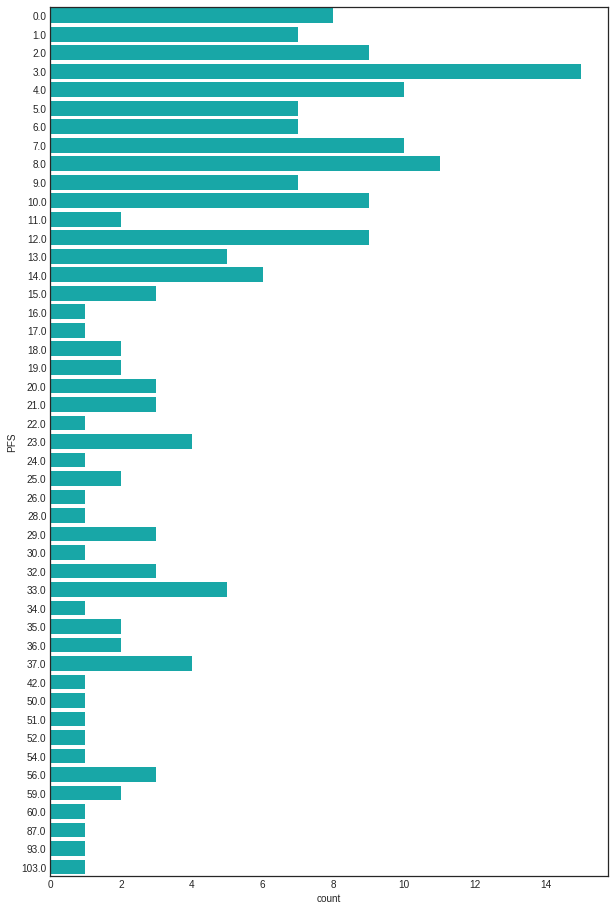

In [ ]:
f, ax = plt.subplots(figsize=(10, 16))
sns.countplot(y="PFS", data=meta[meta['Prg']==1], color="c")

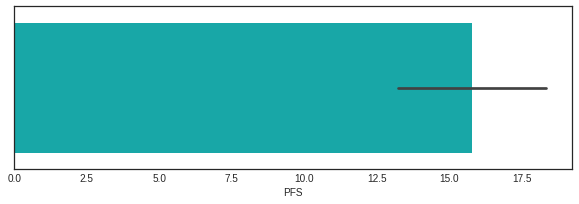

In [ ]:
f, ax = plt.subplots(figsize=(10, 3))
sns.barplot(x="PFS", data=meta[meta['Prg']==1], color="c")

In [ ]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
imp = IterativeImputer(max_iter=30, verbose=1)

In [ ]:
!pip install bayesian-optimization

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from bayes_opt import BayesianOptimization
from sklearn.model_selection import cross_val_score
import xgboost as xgb

In [ ]:
from scipy import interp
from sklearn.metrics import roc_curve, auc, roc_auc_score, precision_recall_curve,average_precision_score

In [ ]:
anal = meta[meta['NAC']!=1]
anal = anal.drop(columns=['NAC'])

## Feature selection

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_base.py:138: FutureWarning:

The default of 'normalize' will be set to False in version 1.2 and deprecated in version 1.4.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LassoLarsIC())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * np.sqrt(n_samples). 

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_base.py:138: FutureWarning:

The default of 'normalize' will be set to False in version 1.2 and deprecated in version 1.4.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To rep

Text(0.5, 1.0, 'Information-criterion for model selection (training time 0.009s)')

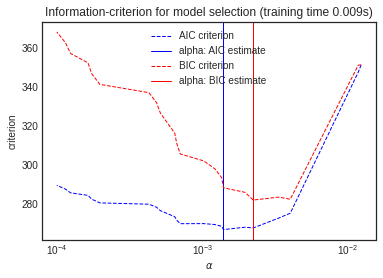

In [ ]:
from sklearn.linear_model import LassoCV, LassoLarsCV, LassoLarsIC
from sklearn import datasets
import time
anal_lass = anal.dropna()
X = anal_lass.loc[:,'Pre_WBC':'Path_CIS']                     #Feature Matrix
y = anal_lass.loc[:,'Prg']        
outcome = 'Prg'


EPSILON = 1e-4


model_bic = LassoLarsIC(criterion='bic')
t1 = time.time()
model_bic.fit(X, y)
t_bic = time.time() - t1
alpha_bic_ = model_bic.alpha_

model_aic = LassoLarsIC(criterion='aic')
model_aic.fit(X, y)
alpha_aic_ = model_aic.alpha_


def plot_ic_criterion(model, name, color):
    criterion_ = model.criterion_
    plt.semilogx(model.alphas_ + EPSILON, criterion_, '--', color=color,
                 linewidth=1, label='%s criterion' % name)
    plt.axvline(model.alpha_ + EPSILON, color=color, linewidth=1,
                label='alpha: %s estimate' % name)
    plt.xlabel(r'$\alpha$')
    plt.ylabel('criterion')


plt.figure()
plot_ic_criterion(model_aic, 'AIC', 'b')
plot_ic_criterion(model_bic, 'BIC', 'r')
plt.legend()
plt.title('Information-criterion for model selection (training time %.3fs)'
          % t_bic)

In [ ]:
X.to_numpy()

array([[5.80e+03, 5.70e+01, 3.16e+01, ..., 0.00e+00, 0.00e+00, 0.00e+00],
       [6.00e+03, 6.33e+01, 2.85e+01, ..., 0.00e+00, 1.00e+00, 1.00e+00],
       [6.90e+03, 7.66e+01, 1.58e+01, ..., 0.00e+00, 1.00e+00, 1.00e+00],
       ...,
       [5.60e+03, 6.28e+01, 2.75e+01, ..., 2.00e+00, 1.00e+00, 1.00e+00],
       [9.20e+03, 5.68e+01, 3.12e+01, ..., 0.00e+00, 1.00e+00, 0.00e+00],
       [8.40e+03, 5.99e+01, 2.44e+01, ..., 0.00e+00, 1.00e+00, 1.00e+00]])

Computing regularization path using the LARS ...
.

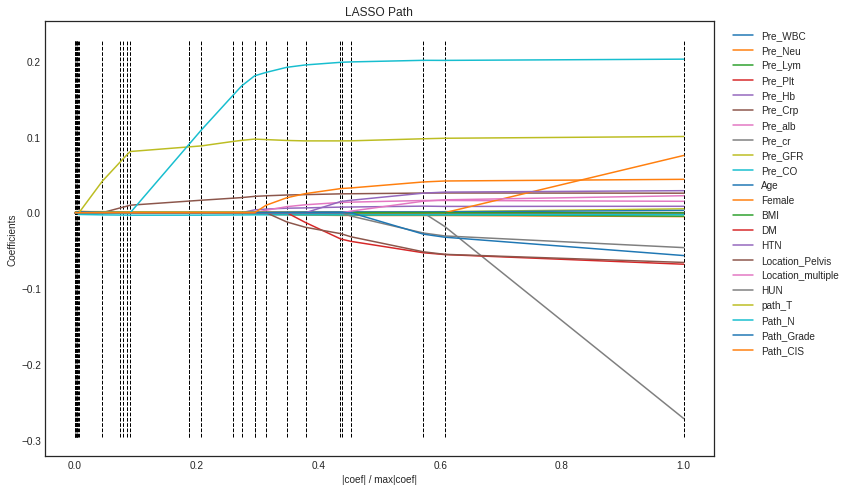

In [ ]:
from itertools import cycle
import numpy as np
import matplotlib.pyplot as plt

from sklearn.linear_model import lasso_path, enet_path
from sklearn import datasets


from sklearn import linear_model
# X /= X.std(axis=0)  # Standardize data (easier to set the l1_ratio parameter)

# Compute paths

eps = 5e-3  # the smaller it is the longer is the path


print("Computing regularization path using the LARS ...")
alphas, _, coefs = linear_model.lars_path(X.to_numpy(), y, method='lasso', verbose=True)

xx = np.sum(np.abs(coefs.T), axis=1)
xx /= xx[-1]

plt.figure(figsize=(12, 8))
plt.plot(xx, coefs.T)
ymin, ymax = plt.ylim()
plt.vlines(xx, ymin, ymax, linestyle='dashed', linewidth=1)
plt.xlabel('|coef| / max|coef|')
plt.ylabel('Coefficients')
plt.title('LASSO Path')
plt.axis('tight')
plt.legend(loc="upper right", labels=X.columns, bbox_to_anchor=(1.2, 1.00))
plt.show()

In [ ]:
LARS = linear_model.lars_path(X.to_numpy(), y, method='lasso', verbose=True)

.

In [ ]:
lasso_indexes = pd.DataFrame(LARS[1],index = X.columns, columns=['rank'])['rank']
lasso_indexes =lasso_indexes.sort_values(ascending=False)
x_col = lasso_indexes[lasso_indexes<23].index
x_col

Index(['DM', 'Path_N', 'Pre_cr', 'Pre_Hb', 'HUN', 'path_T', 'HTN',
       'Location_multiple', 'Location_Pelvis', 'Pre_Plt', 'Path_CIS', 'Age',
       'Pre_Neu', 'Pre_WBC', 'Path_Grade', 'BMI', 'Pre_Crp', 'Female',
       'Pre_GFR', 'Pre_alb', 'Pre_CO', 'Pre_Lym'],
      dtype='object')

In [ ]:
lasso_indexes

DM                   21
Path_N               20
Pre_cr               19
Pre_Hb               18
HUN                  17
path_T               16
HTN                  15
Location_multiple    14
Location_Pelvis      13
Pre_Plt              12
Path_CIS             11
Age                  10
Pre_Neu               9
Pre_WBC               8
Path_Grade            7
BMI                   6
Pre_Crp               5
Female                4
Pre_GFR               3
Pre_alb               2
Pre_CO                1
Pre_Lym               0
Name: rank, dtype: int64

In [ ]:
from sklearn.linear_model import LassoCV
from sklearn.preprocessing import scale

meta_lass = meta.dropna()
X = meta_lass.loc[:,'Pre_WBC':'Path_CIS']                     #Feature Matrix
y = meta_lass.loc[:,'Prg']  

X_scaled = scale(X)
lasso = LassoCV().fit(X_scaled, y)
print(lasso.coef_)


[-0.         -0.         -0.         -0.         -0.          0.
  0.          0.          0.          0.         -0.00670629 -0.
 -0.         -0.         -0.         -0.         -0.          0.
  0.          0.11392576  0.10633074  0.          0.        ]


In [ ]:
xx

array([0.00000000e+00, 1.11637774e-06, 1.64415764e-05, 1.36918098e-03,
       2.03762922e-03, 2.83862510e-03, 3.74772738e-03, 3.93255071e-03,
       5.43384422e-03, 6.54345576e-03, 4.47185997e-02, 7.33781831e-02,
       7.82333532e-02, 8.53351072e-02, 9.07808200e-02, 1.87600514e-01,
       1.87625858e-01, 2.07613237e-01, 2.58810593e-01, 2.73584656e-01,
       2.95030413e-01, 2.95032133e-01, 3.13972647e-01, 3.47885966e-01,
       3.78652746e-01, 4.36051204e-01, 4.38808802e-01, 4.53410290e-01,
       5.72141774e-01, 6.07199435e-01, 1.00000000e+00])

In [ ]:
len(LARS[1])

22

In [ ]:
X

,Pre_WBC,Pre_Neu,Pre_Lym,Pre_Plt,Pre_Hb,Pre_Crp,Pre_alb,Pre_cr,Pre_GFR,Pre_CO,...,BMI,DM,HTN,Location_Pelvis,Location_multiple,HUN,path_T,Path_N,Path_Grade,Path_CIS
0,6500.0,53.5,31.3,233000.0,15.4,0.10,4.4,1.10,96.106645,25.1,...,28.000000,0,0,1,1,1,3,NaN,0.0,0.0
1,4100.0,51.1,39.7,234000.0,14.8,0.10,4.5,0.90,80.307387,25.6,...,21.000000,0,0,1,1,1,2,NaN,1.0,0.0
2,5800.0,57.0,31.6,173000.0,11.9,1.16,4.1,1.10,81.768519,23.4,...,18.700000,0,0,0,1,0,4,0.0,0.0,0.0
3,8400.0,64.4,28.2,351000.0,11.5,7.77,4.3,2.10,167.463536,25.7,...,25.300000,1,1,1,1,0,5,NaN,1.0,0.0
4,8500.0,51.3,33.5,230000.0,14.8,0.10,4.3,1.00,78.081601,26.4,...,24.500000,0,1,1,1,0,2,NaN,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
673,7800.0,66.9,24.3,231000.0,11.4,0.14,3.9,1.02,63.495450,0.0,...,28.700000,0,1,1,2,0,5,NaN,NaN,NaN
674,7100.0,65.8,22.3,195000.0,10.9,2.18,3.3,1.71,133.519537,23.3,...,25.900000,1,1,1,1,0,5,NaN,NaN,NaN
675,11200.0,61.9,29.8,337000.0,11.8,0.15,4.3,0.81,46.022233,27.8,...,24.600000,1,1,0,1,0,3,NaN,NaN,NaN
676,6100.0,64.4,26.3,236000.0,13.7,0.19,3.9,1.55,128.022534,24.7,...,26.100000,0,0,0,1,1,4,NaN,NaN,NaN


In [ ]:
reg = LassoCV()
reg.fit(X, y)
print("Best alpha using built-in LassoCV: %f" % reg.alpha_)
print("Best score using built-in LassoCV: %f" %reg.score(X,y))
coef = pd.Series(reg.coef_, index = X.columns)

Best alpha using built-in LassoCV: 2135.277778
Best score using built-in LassoCV: 0.000000


In [ ]:
print("Lasso picked " + str(sum(coef != 0)) + " variables and eliminated the other " +  str(sum(coef == 0)) + " variables")

Lasso picked 0 variables and eliminated the other 23 variables


Text(0.5, 1.0, 'Feature importance using Lasso Model')

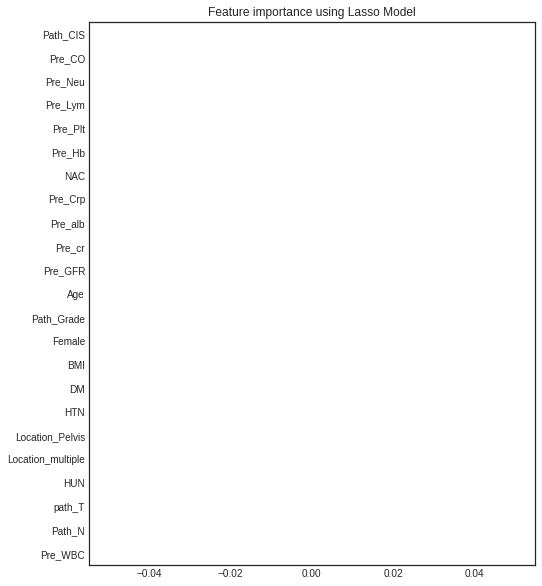

In [ ]:
imp_coef = coef.sort_values()
import matplotlib
matplotlib.rcParams['figure.figsize'] = (8.0, 10.0)
imp_coef.plot(kind = "barh")
plt.title("Feature importance using Lasso Model")

In [ ]:
from xgbse.converters import convert_to_structured
from sklearn.model_selection import train_test_split

In [ ]:
from bayes_opt import BayesianOptimization
from sklearn.model_selection import cross_val_score
import xgboost as xgb

In [ ]:
import optuna

In [ ]:
print(xgb.__version__)

1.6.2


In [ ]:
from scipy import interp
from sklearn.metrics import roc_curve, auc, roc_auc_score, precision_recall_curve,average_precision_score
import shap
from xgbse import XGBSEKaplanNeighbors
from xgbse._kaplan_neighbors import DEFAULT_PARAMS
from xgbse.metrics import concordance_index
import sklearn.datasets
import sklearn.metrics

In [ ]:
from xgbse.converters import convert_to_structured,convert_data_to_xgb_format

In [ ]:
meta.columns

Index(['Pre_WBC', 'Pre_Neu', 'Pre_Lym', 'Pre_Plt', 'Pre_Hb', 'NAC', 'Pre_Crp',
       'Pre_alb', 'Pre_cr', 'Pre_GFR', 'Pre_CO', 'Age', 'Female', 'BMI', 'DM',
       'HTN', 'Location_Pelvis', 'Location_multiple', 'HUN', 'path_T',
       'Path_N', 'Path_Grade', 'Path_CIS', 'Prg', 'PFS'],
      dtype='object')

In [ ]:
anal = meta[meta['NAC']!=1]

In [ ]:
anal = anal.drop(columns=['NAC'])

In [ ]:
meta['PFS'].describe()

count    678.000000
mean      40.839233
std       30.796456
min        0.000000
25%       13.000000
50%       35.000000
75%       61.000000
max      121.000000
Name: PFS, dtype: float64

In [ ]:
meta[meta['Prg']==1]['PFS'].describe()

count    182.000000
mean      15.791209
std       17.510228
min        0.000000
25%        4.000000
50%        9.500000
75%       21.000000
max      103.000000
Name: PFS, dtype: float64

In [ ]:
len(anal[anal['Prg']!=0])

162

In [ ]:
anal['Prg'].unique()

array([0., 1.])

In [ ]:
X = anal[['Pre_WBC', 'Pre_Neu', 'Pre_Lym', 'Pre_Plt', 'Pre_Hb', 'Pre_Crp',
       'Pre_alb', 'Pre_cr', 'Pre_GFR', 'Pre_CO', 'Age', 'Female', 'BMI', 'DM',
       'HTN', 'Location_Pelvis', 'Location_multiple', 'HUN', 'path_T', 'Path_N',
       'Path_Grade', 'Path_CIS']]
y = anal[['Prg']]

In [ ]:
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=7)
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size=0.1, random_state=7)

In [ ]:
scale_pos_weight= len(y_train[y_train['Prg']==0])/len(y_train[y_train['Prg']==1])

In [ ]:
scale_pos_weight

2.5793650793650795

In [ ]:
import warnings

def fxn():
    warnings.warn("deprecated", DeprecationWarning)

with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    fxn()

In [ ]:
dtrain1 = xgb.DMatrix(X_train, y_train)


def bo_tune_xgb(base_score, max_depth, gamma, eta, subsample, colsample_bytree, min_child_weight, scale_pos_weight):
    params = {'base_score':base_score,
              'max_depth': int(max_depth),
              'gamma': gamma,
              'min_child_weight':int(min_child_weight),
              'eta': eta,
              'subsample' : subsample,
              'colsample_bytree': colsample_bytree,
              'eval_metric': 'logloss',
              'scale_pos_weight': scale_pos_weight
              }
    cv_result = xgb.cv(params, dtrain1, nfold=5)
    #Return the negative RMSE
    return -1.0 * cv_result['test-logloss-mean'].iloc[-1]

#Invoking the Bayesian Optimizer with the specified parameters to tune
xgb_bo = BayesianOptimization(bo_tune_xgb, {'base_score': (0.1,0.3),
                                            'max_depth': (2, 10),
                                            'min_child_weight' : (1,12),
                                            'gamma': (0, 1.0),
                                            'eta' : (0.01,0.3),
                                            'subsample' : (0.8,1),
                                            'colsample_bytree': (0.8,1),
                                            'scale_pos_weight':(1,10)
                                            })

#performing Bayesian optimization for 5 iterations with 8 steps of random exploration with an #acquisition function of expected improvement
xgb_bo.maximize(n_iter=25, init_points=10, acq='ei')

|   iter    |  target   | base_s... | colsam... |    eta    |   gamma   | max_depth | min_ch... | scale_... | subsample |
-------------------------------------------------------------------------------------------------------------------------


/usr/local/lib/python3.7/dist-packages/bayes_opt/target_space.py:49: DeprecationWarning:

`np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations



|  1        | -0.8657   |  0.2514   |  0.9873   |  0.2052   |  0.4211   |  9.094    |  11.82    |  3.766    |  0.9615   |
|  2        | -0.6968   |  0.2621   |  0.8193   |  0.1504   |  0.7586   |  6.349    |  6.108    |  6.783    |  0.8998   |
|  3        | -0.9944   |  0.1971   |  0.967    |  0.2995   |  0.9272   |  7.366    |  7.214    |  4.785    |  0.8684   |
|  4        | -0.5428   |  0.1203   |  0.818    |  0.05175  |  0.1149   |  2.717    |  1.087    |  2.516    |  0.8064   |
|  5        | -0.8611   |  0.2295   |  0.8598   |  0.2119   |  0.6159   |  8.99     |  4.639    |  9.871    |  0.8783   |
|  6        | -0.6711   |  0.2041   |  0.927    |  0.1794   |  0.2347   |  3.491    |  9.529    |  6.722    |  0.9297   |
|  7        | -0.5567   |  0.1242   |  0.8237   |  0.08856  |  0.5928   |  3.713    |  9.564    |  5.371    |  0.8826   |
|  8        | -0.5274   |  0.2082   |  0.9724   |  0.08005  |  0.869    |  4.615    |  2.611    |  1.846    |  0.8403   |
|  9        | -0.708    

In [ ]:
params = xgb_bo.max['params']
print(params)

{'base_score': 0.208232917112177, 'colsample_bytree': 0.9724202428266111, 'eta': 0.08005402853798997, 'gamma': 0.8690442670515122, 'max_depth': 4.615495783733268, 'min_child_weight': 2.610785056691407, 'scale_pos_weight': 1.845587254152222, 'subsample': 0.8403413006732393}


In [ ]:
params['max_depth']= int(params['max_depth'])
params['min_child_weight']= int(params['min_child_weight'])

In [ ]:
from scipy import interp
from sklearn.metrics import roc_curve, auc, roc_auc_score, precision_recall_curve,average_precision_score

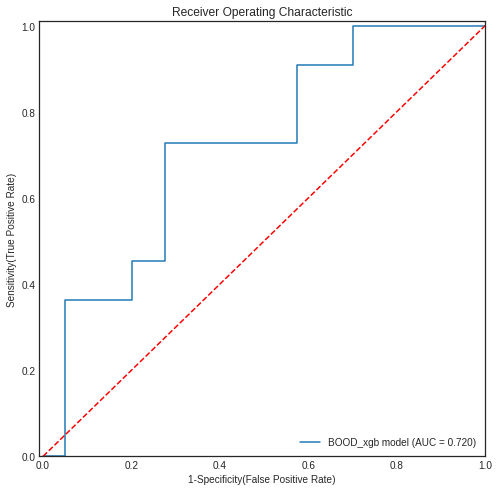

In [ ]:
plt.style.use(['seaborn-white'])

xgb_model = xgb.XGBClassifier(**params)
xgb_model.fit(X_train, y_train)
y_test_proba = xgb_model.predict_proba(X_test)
y_pred=xgb_model.predict(X_test) 
fpr, tpr, thresholds = roc_curve(y_test, y_test_proba[:,1],pos_label=1)
auc = roc_auc_score (y_test, y_test_proba[:,1])    
plt.figure(figsize=(8,8))
plt.plot(fpr, tpr, label='BOOD_xgb model (AUC = %0.3f)' % auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([-0.01, 1.0])
plt.ylim([0.0, 1.01])
plt.xlabel('1-Specificity(False Positive Rate)')
plt.ylabel('Sensitivity(True Positive Rate)')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

In [ ]:
E= anal[['Prg']]

In [ ]:
weight = len(E[E==0])/ len(E[E==1])

In [ ]:
X = anal[['Pre_WBC', 'Pre_Neu', 'Pre_Lym', 'Pre_Plt', 'Pre_Hb', 'Pre_Crp',
       'Pre_alb', 'Pre_cr', 'Pre_GFR', 'Pre_CO', 'Age', 'Female', 'BMI', 'DM',
       'HTN', 'Location_Pelvis', 'Location_multiple', 'HUN', 'path_T', 'Path_N',
       'Path_Grade', 'Path_CIS']]
y = anal[['Prg', 'PFS']]

In [ ]:
y = convert_to_structured(anal['PFS'], anal['Prg'])

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=7)
X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.1, random_state=7)

In [ ]:
anal['HTN'].replace({2:1},inplace=True) 

In [ ]:
categorical = ['Female','DM','HTN', 'path_T', 'Path_N','Location_multiple','Location_Pelvis','Path_Grade', 'Path_CIS', 'Prg', 'HUN']

In [ ]:
Table_1 = TableOne(anal, dip_test=True, normal_test=True, tukey_test=True,
         nonnormal=['Pre_WBC','Pre_Hb', 'Pre_Neu', 'Pre_Lym', 'Pre_Plt', 'Pre_Crp', 'Pre_alb', 'Pre_cr', 'Pre_GFR', 'Pre_CO', 'Age', 'BMI','PFS'],
         categorical=categorical)

In [ ]:
Table_1.to_csv(datapath+'/'+'Table1.csv')

In [ ]:
Table_1

,,Missing,Overall
n,,,628
"Pre_WBC, median [Q1,Q3]",,1,"6400.0 [5400.0,7800.0]"
"Pre_Neu, median [Q1,Q3]",,1,"60.8 [53.1,67.2]"
"Pre_Lym, median [Q1,Q3]",,1,"28.5 [22.4,34.8]"
"Pre_Plt, median [Q1,Q3]",,1,"232000.0 [194000.0,272000.0]"
"Pre_Hb, median [Q1,Q3]",,1,"13.0 [11.8,14.2]"
"Pre_Crp, median [Q1,Q3]",,1,"0.1 [0.1,0.4]"
"Pre_alb, median [Q1,Q3]",,1,"3.9 [3.6,4.1]"
"Pre_cr, median [Q1,Q3]",,1,"1.0 [0.8,1.3]"
"Pre_GFR, median [Q1,Q3]",,1,"75.3 [58.5,95.6]"


628

In [ ]:
train_idx = X_train.index
test_idx = X_test.index
valid_idx = X_valid.index 

In [ ]:
X_train = X_train.values
X_test = X_test.values
X_valid = X_valid.values


In [ ]:
anal.loc[train_idx].to_csv(savepath+'/'+'train_data.csv')
anal.loc[test_idx].to_csv(savepath+'/'+'test_data.csv')
anal.loc[valid_idx].to_csv(savepath+'/'+'valid_data.csv')

In [ ]:
xgb_train = convert_data_to_xgb_format(X_train,y_train,'survival:aft')
xgb_valid = convert_data_to_xgb_format(X_valid,y_valid,'survival:aft')
xgb_test = convert_data_to_xgb_format(X_test,y_test,'survival:aft')

In [ ]:
anal[['Prg', 'PFS']]['PFS'].max()

121.0

In [ ]:
TIME_BINS = np.arange(0, 130, 2)
TIME_BINS

array([  0,   2,   4,   6,   8,  10,  12,  14,  16,  18,  20,  22,  24,
        26,  28,  30,  32,  34,  36,  38,  40,  42,  44,  46,  48,  50,
        52,  54,  56,  58,  60,  62,  64,  66,  68,  70,  72,  74,  76,
        78,  80,  82,  84,  86,  88,  90,  92,  94,  96,  98, 100, 102,
       104, 106, 108, 110, 112, 114, 116, 118, 120, 122, 124, 126, 128])

In [ ]:
from xgbse import XGBSEKaplanTree, XGBSEBootstrapEstimator,XGBSEDebiasedBCE, XGBSEStackedWeibull
from xgbse.metrics import concordance_index, approx_brier_score,dist_calibration_score

In [ ]:
# to easily plot confidence intervals
def plot_ci(mean, upper_ci, lower_ci, i=42, title='Probability of survival $P(T \geq t)$'):
    
    # plotting mean and confidence intervals
    plt.figure(figsize=(12, 4), dpi=120)
    plt.plot(mean.columns,mean.iloc[i])
    plt.fill_between(mean.columns, lower_ci.iloc[i], upper_ci.iloc[i], alpha=0.2)

    plt.title(title)
    plt.xlabel('Time [days]')
    plt.ylabel('Probability')
    plt.tight_layout()
    

<>:2: DeprecationWarning:

invalid escape sequence \g

<>:2: DeprecationWarning:

invalid escape sequence \g

<>:2: DeprecationWarning:

invalid escape sequence \g

<ipython-input-499-b73e5174d855>:2: DeprecationWarning:

invalid escape sequence \g



In [ ]:
PARAMS_XGB_AFT = {
    'objective': 'survival:aft',
    'eval_metric': 'aft-nloglik',
    'aft_loss_distribution': 'logistic',
    'aft_loss_distribution_scale': 1,
    'tree_method': 'hist', 
    'learning_rate': 5e-2, 
    'max_depth': 10, 
    'booster':'gbtree',
    'min_child_weight': 5
}

PARAMS_LR = {
    'C': 1e-3,
    'max_iter': 2
}


N_NEIGHBORS = 50


In [ ]:
def convert_y(y):
    """
    Convert structured array y into an array of
    event indicators (E) and time of events (T).
    Args:
        y (structured array(numpy.bool_, numpy.number)): Binary event indicator as first field,
            and time of event or time of censoring as second field.
    Returns:
        T ([np.array, pd.Series]): Time of events
        E ([np.array, pd.Series]): Binary event indicator
    """
    event_field, time_field = y.dtype.names
    return y[event_field], y[time_field]

In [ ]:
E, T  = convert_y(y_train)

In [ ]:
from lifelines import KaplanMeierFitter
kmf = KaplanMeierFitter()

kmf.fit(T, E)



<lifelines.KaplanMeierFitter:"KM_estimate", fitted with 508 total observations, 367 right-censored observations>

In [ ]:
PARAMS_XGB_AFT

{'objective': 'survival:aft',
 'eval_metric': 'aft-nloglik',
 'aft_loss_distribution': 'logistic',
 'aft_loss_distribution_scale': 1,
 'tree_method': 'hist',
 'learning_rate': 0.05,
 'max_depth': 10,
 'booster': 'gbtree',
 'min_child_weight': 5}

In [ ]:
base_params = {'verbosity': 0,
              'objective': 'survival:aft',
              'eval_metric': 'aft-nloglik',
              'tree_method': 'hist',
              'booster': 'gbtree',
              'scale_pos_weight': weight
              }  # Hyperparameters common to all trials


def objective(trial):
    params = {'learning_rate': trial.suggest_loguniform('learning_rate', 0.001, 0.2),
              'aft_loss_distribution': trial.suggest_categorical('aft_loss_distribution',
                                                                  ['normal', 'logistic', 'extreme']),
              'aft_loss_distribution_scale': trial.suggest_loguniform('aft_loss_distribution_scale', 0.6,1.5),
              'max_depth': trial.suggest_int('max_depth', 3, 20),
              'lambda': trial.suggest_loguniform('lambda', 1e-1, 1.0),
              'alpha': trial.suggest_loguniform('alpha', 1e-1, 1.0),
              'min_child_weight': trial.suggest_loguniform('min_child_weight', 1, 10),
              'colsample_bynode':trial.suggest_loguniform('colsample_bynode', 0.7, 1),
              'colsample_bytree':trial.suggest_loguniform('colsample_bytree', 0.7, 1),
              'colsample_bylevel':trial.suggest_loguniform('colsample_bylevel', 0.7, 1),
              'booster':trial.suggest_categorical('booster',
                                                  ['gbtree', 'dart'])
              }  # Search space

    params.update(base_params)
    pruning_callback = optuna.integration.XGBoostPruningCallback(trial, 'valid-aft-nloglik')
    bst = xgb.train(params, xgb_train, num_boost_round=1000,
                    evals=[(xgb_train, 'train'), (xgb_valid, 'valid')], 
                    early_stopping_rounds=50, verbose_eval=False, callbacks=[pruning_callback])
    if bst.best_iteration >= 25:
        return bst.best_score
    else:
        return np.inf  # Reject models with < 25 trees

In [ ]:
study = optuna.create_study(direction='minimize')
study.optimize(objective, n_trials=500, timeout=600)
print('Completed hyperparameter tuning with best aft-nloglik = {}.'.format(study.best_trial.value))
params = {}
params.update(base_params)
params.update(study.best_trial.params)

[I 2022-08-24 13:59:45,310] A new study created in memory with name: no-name-4219551e-bc8c-4be5-ae89-8cc797760c94
[I 2022-08-24 13:59:46,531] Trial 0 finished with value: 1.2285532818346692 and parameters: {'learning_rate': 0.007365047298383476, 'aft_loss_distribution': 'extreme', 'aft_loss_distribution_scale': 0.8307101397354957, 'max_depth': 17, 'lambda': 0.6006620756410682, 'alpha': 0.36258613712232945, 'min_child_weight': 2.893526150232004, 'colsample_bynode': 0.7073504634354538, 'colsample_bytree': 0.7010132593272937, 'colsample_bylevel': 0.8610436864397601, 'booster': 'gbtree'}. Best is trial 0 with value: 1.2285532818346692.
[I 2022-08-24 13:59:47,443] Trial 1 finished with value: 4.978815970375245 and parameters: {'learning_rate': 0.0023163509366018967, 'aft_loss_distribution': 'extreme', 'aft_loss_distribution_scale': 1.2159459988945978, 'max_depth': 6, 'lambda': 0.11250969478198085, 'alpha': 0.23546426748350746, 'min_child_weight': 3.970739254357889, 'colsample_bynode': 0.997

Completed hyperparameter tuning with best aft-nloglik = 0.9651966332466128.


In [ ]:
fig = optuna.visualization.plot_optimization_history(study)
fig.show()

In [ ]:
from optuna.visualization import plot_contour
from optuna.visualization import plot_edf
from optuna.visualization import plot_intermediate_values
from optuna.visualization import plot_optimization_history
from optuna.visualization import plot_parallel_coordinate
from optuna.visualization import plot_param_importances
from optuna.visualization import plot_slice


plot_intermediate_values(study)


In [ ]:
plot_parallel_coordinate(study)

In [ ]:
params_WB = {
    'penalizer':0.001
}

In [ ]:
params

{'verbosity': 0,
 'objective': 'survival:aft',
 'eval_metric': 'aft-nloglik',
 'tree_method': 'hist',
 'booster': 'dart',
 'scale_pos_weight': 1.0,
 'learning_rate': 0.16478034317910062,
 'aft_loss_distribution': 'logistic',
 'aft_loss_distribution_scale': 0.758859418301067,
 'max_depth': 12,
 'lambda': 0.17516716935995166,
 'alpha': 0.42634831594100503,
 'min_child_weight': 4.127074058620464,
 'colsample_bynode': 0.7143874009322254,
 'colsample_bytree': 0.9210663245977627,
 'colsample_bylevel': 0.7100796617142006}

In [ ]:
# from lifelines import CoxPHFitter
# temp = anal.loc[train_idx]
# temp = temp.dropna()
# cph = CoxPHFitter().fit(temp, 'PFS', 'Prg')


In [ ]:
# %%time

# base model as XGBSEKaplanTree

# xgbse_model = XGBSEKaplanTree(params)

xgbse_model = XGBSEKaplanNeighbors(params, N_NEIGHBORS)

# xgbse_model = XGBSEStackedWeibull(params, params_WB)
# xgbse_model = XGBSEDebiasedBCE(params, PARAMS_LR)


# bootstrap meta estimator
xgbse_model.fit(X_train, y_train,
              #  persist_train=True,
                validation_data=(X_valid, y_valid),
                early_stopping_rounds=100,
                index_id=X.index,
                num_boost_round=1000,
                time_bins=TIME_BINS
)


# # # bootstrap meta estimator
# bootstrap_estimator = XGBSEBootstrapEstimator(xgbse_model, n_estimators=20)
# bootstrap_estimator.fit(
#     X_train,
#     y_train,
#     validation_data=(X_test, y_test),
#     early_stopping_rounds=10,
#     time_bins=TIME_BINS,
# )
# mean = xgbse_model.predict(X_test)


mean, upper_ci, lower_ci = xgbse_model.predict(X_test, return_ci=True)


# # predicting
# mean, upper_ci, lower_ci = bootstrap_estimator.predict(X_test, return_ci=True)

# print metrics
print(f"C-index: {concordance_index(y_test, mean)}")
print(f"Avg. Brier Score: {approx_brier_score(y_test, mean)}")
print(f"Calibration Score: {dist_calibration_score(y_test, mean)> 0.05}")


C-index: 0.8703071672354948
Avg. Brier Score: 0.06799078193207313
Calibration Score: True


In [ ]:

dist_calibration_score(y_test, mean)

0.4102210287441247

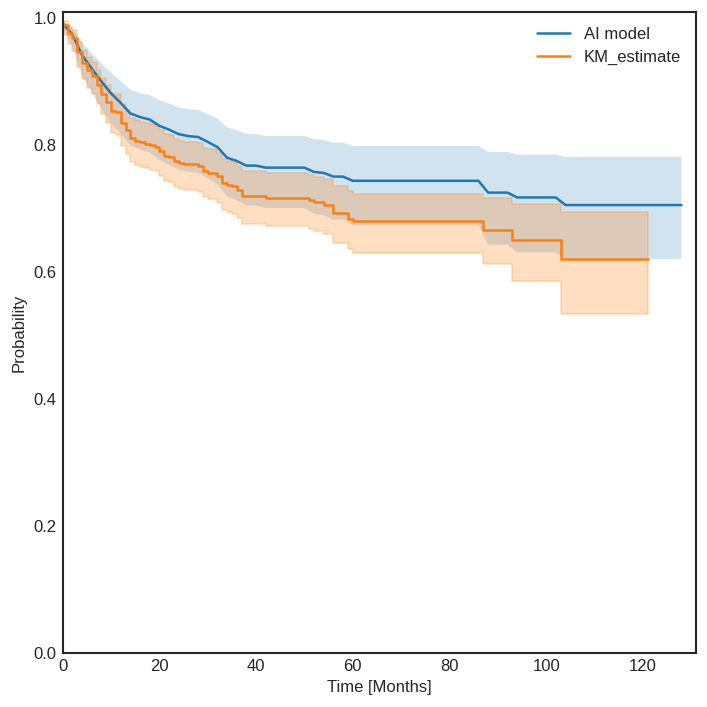

In [ ]:
fig = plt.figure(figsize=(6, 6), dpi=120)
ax = fig.add_subplot(1, 1, 1)

# fig, ax = plt.subplots(figsize=(6, 6), dpi=120)
# plt.figure(figsize=(6, 6), dpi=120)



line1, = ax.plot(mean.columns, mean.mean(), label="AI model")
line2 = ax.fill_between(mean.columns, lower_ci.mean(), upper_ci.mean(), alpha=0.2)


line3 = kmf.plot_survival_function()

ax.legend(shadow=True)


plt.xlabel('Time [Months]')
plt.ylabel('Probability')
plt.xlim([-0.01, 131])
plt.ylim([0.0, 1.01])
plt.tight_layout()

In [ ]:
risks = 1- mean

In [ ]:

mean_1 = xgbse_model.predict(X_train, return_ci=False)
print(f"C-index: {concordance_index(y_train, mean_1)}")

C-index: 0.9186646433990895


In [ ]:
mean_1 = xgbse_model.predict(X_valid, return_ci=False)
print(f"C-index: {concordance_index(y_valid, mean_1)}")

C-index: 0.7560975609756098


In [ ]:
xgbse_model

XGBSEKaplanNeighbors(n_neighbors=50,
                     xgb_params={'aft_loss_distribution': 'logistic',
                                 'aft_loss_distribution_scale': 0.758859418301067,
                                 'alpha': 0.42634831594100503,
                                 'booster': 'dart',
                                 'colsample_bylevel': 0.7100796617142006,
                                 'colsample_bynode': 0.7143874009322254,
                                 'colsample_bytree': 0.9210663245977627,
                                 'eval_metric': 'aft-nloglik',
                                 'lambda': 0.17516716935995166,
                                 'learning_rate': 0.16478034317910062,
                                 'max_depth': 12,
                                 'min_child_weight': 4.127074058620464,
                                 'objective': 'survival:aft',
                                 'scale_pos_weight': 1.0, 'tree_method': 'hist',
            

In [ ]:
import pickle

In [ ]:
from joblib import Parallel, delayed
import joblib
  
  
# Save the model as a pickle in a file
joblib.dump(xgbse_model, savepath+'UTUC_surv.pkl')

['/content/drive/My Drive/Colab Notebooks/2022_UTUC_surv/save/UTUC_surv.pkl']

In [ ]:
import lime
import lime.lime_tabular

In [ ]:
explainer = lime.lime_tabular.LimeTabularExplainer(X_train, feature_names=X.columns, class_names='PRG', discretize_continuous=True)


In [ ]:
from traitlets.config import validate
# Re-run training with the best hyperparameter combination
print('Re-running the best trial... params = {}'.format(params))

xgb_model = xgb.train(
            params,
            xgb_train,
            # maximize=True,
            evals= [(xgb_valid, 'eval')],
            num_boost_round=1000,
            early_stopping_rounds=100,
            verbose_eval=10
)

Re-running the best trial... params = {'verbosity': 0, 'objective': 'survival:aft', 'eval_metric': 'aft-nloglik', 'tree_method': 'hist', 'booster': 'dart', 'scale_pos_weight': 1.0, 'learning_rate': 0.16478034317910062, 'aft_loss_distribution': 'logistic', 'aft_loss_distribution_scale': 0.758859418301067, 'max_depth': 12, 'lambda': 0.17516716935995166, 'alpha': 0.42634831594100503, 'min_child_weight': 4.127074058620464, 'colsample_bynode': 0.7143874009322254, 'colsample_bytree': 0.9210663245977627, 'colsample_bylevel': 0.7100796617142006}
[0]	eval-aft-nloglik:1.20949
[10]	eval-aft-nloglik:1.03011
[20]	eval-aft-nloglik:0.98288
[30]	eval-aft-nloglik:0.97206
[40]	eval-aft-nloglik:0.96900
[50]	eval-aft-nloglik:0.97661
[60]	eval-aft-nloglik:0.97758
[70]	eval-aft-nloglik:0.97606
[80]	eval-aft-nloglik:0.98650
[90]	eval-aft-nloglik:0.98894
[100]	eval-aft-nloglik:0.99825
[110]	eval-aft-nloglik:1.00279
[120]	eval-aft-nloglik:1.00872
[130]	eval-aft-nloglik:1.01851
[140]	eval-aft-nloglik:1.02797
[1

In [ ]:
from lifelines.utils import concordance_index as cindex

preds = xgb_model.predict(xgb_test).astype(float)
T = anal['PFS'][test_idx]
E = anal['Prg'][test_idx]
cind = cindex(T, preds , E)
print(f"C-index: {cind:.3f}")
print(f"Average survival time: {preds.mean():.0f} Months")

C-index: 0.796
Average survival time: 853 Months


In [ ]:
preds_2 = xgb_model.predict(xgb_train).astype(float)
T_2 = anal['PFS'][train_idx]
E_2 = anal['Prg'][train_idx]
cind_2 = cindex(T_2, preds_2, E_2)

preds_3 = xgb_model.predict(xgb_valid).astype(float)
T_3 = anal['PFS'][valid_idx]
E_3 = anal['Prg'][valid_idx]
cind_3 = cindex(T_3, preds_3, E_3)

print (cind_2, cind_3)

0.9961821293562281 0.7108753315649867


In [ ]:
X.columns

Index(['Pre_WBC', 'Pre_Neu', 'Pre_Lym', 'Pre_Plt', 'Pre_Hb', 'Pre_Crp',
       'Pre_alb', 'Pre_cr', 'Pre_GFR', 'Pre_CO', 'Age', 'Female', 'BMI', 'DM',
       'HTN', 'Location_Pelvis', 'Location_multiple', 'HUN', 'path_T',
       'Path_N', 'Path_Grade', 'Path_CIS'],
      dtype='object')

<function matplotlib.pyplot.show(*args, **kw)>

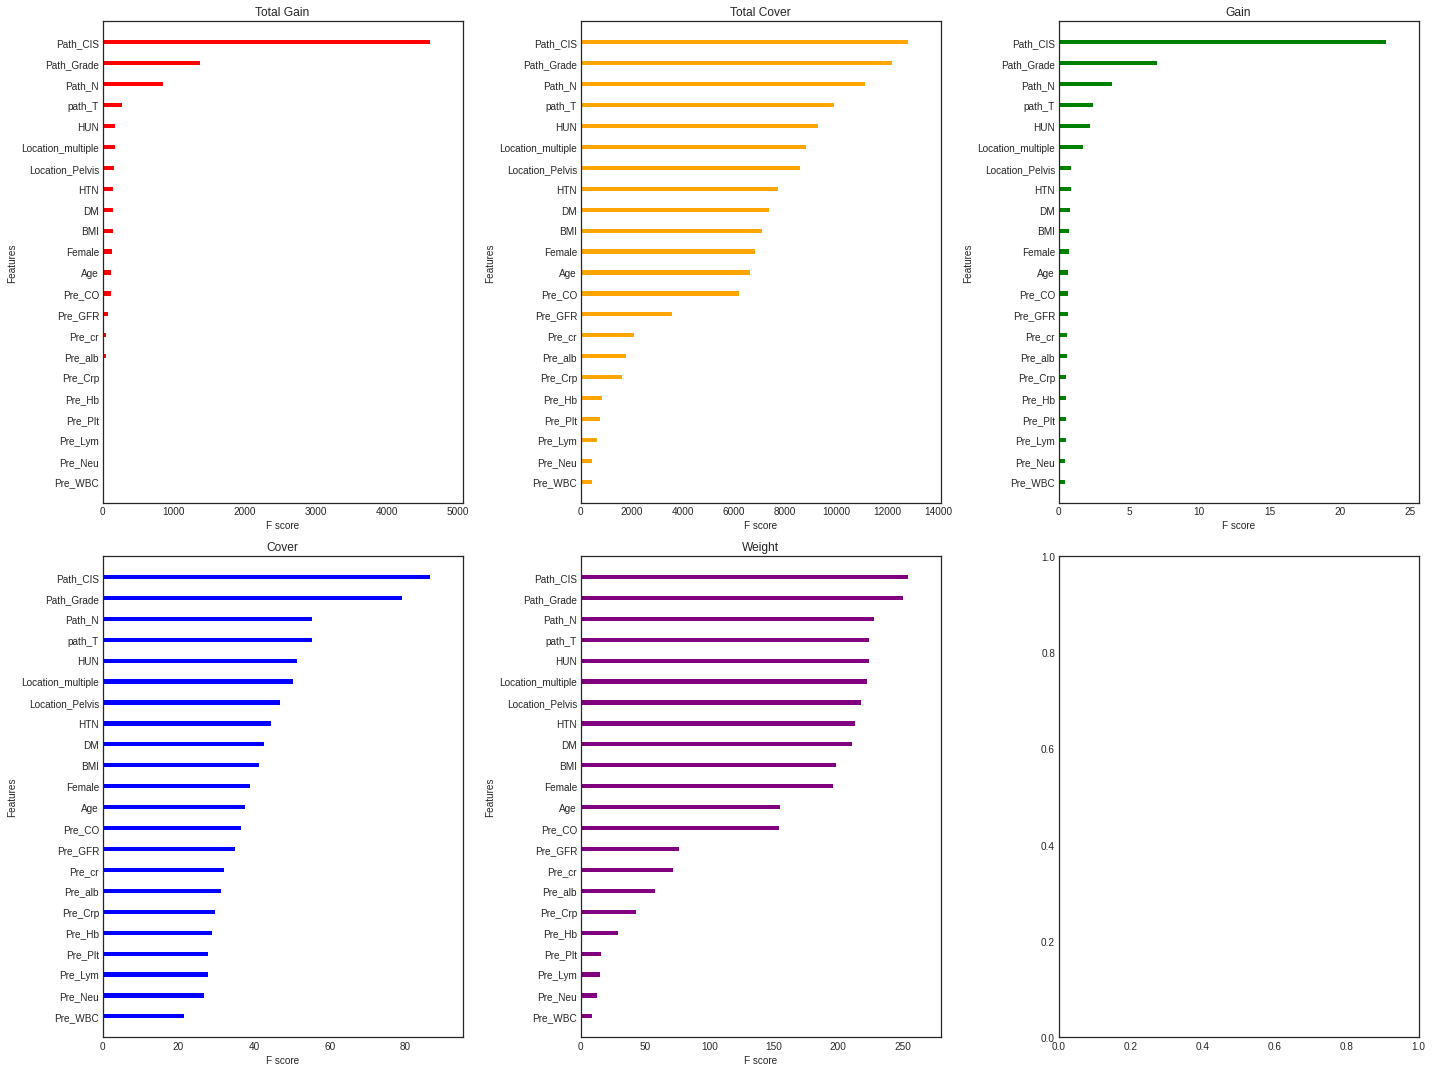

In [ ]:
from xgboost import plot_importance

fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(20,15))

axes = [ax for row_axes in axes for ax in row_axes]

plot_importance(xgb_model,importance_type='total_gain', title='Total Gain', grid=False, ax=axes[0], color='red',show_values=False).set_yticklabels(X.columns)
plot_importance(xgb_model,importance_type='total_cover', title='Total Cover', grid=False, ax=axes[1] ,color='orange',show_values=False).set_yticklabels(X.columns)
plot_importance(xgb_model,importance_type='gain', title='Gain', grid=False, ax=axes[2], color='green',show_values=False).set_yticklabels(X.columns)
plot_importance(xgb_model,importance_type='cover', title='Cover', grid=False, ax=axes[3], color='blue',show_values=False).set_yticklabels(X.columns)
plot_importance(xgb_model,importance_type='weight', title='Weight', grid=False, ax=axes[4], color='purple',show_values=False).set_yticklabels(X.columns)

plt.tight_layout()
plt
plt.show


In [ ]:
import shap

# load JS visualization code to notebook
shap.initjs()

In [ ]:
train_data = X.loc[train_idx]

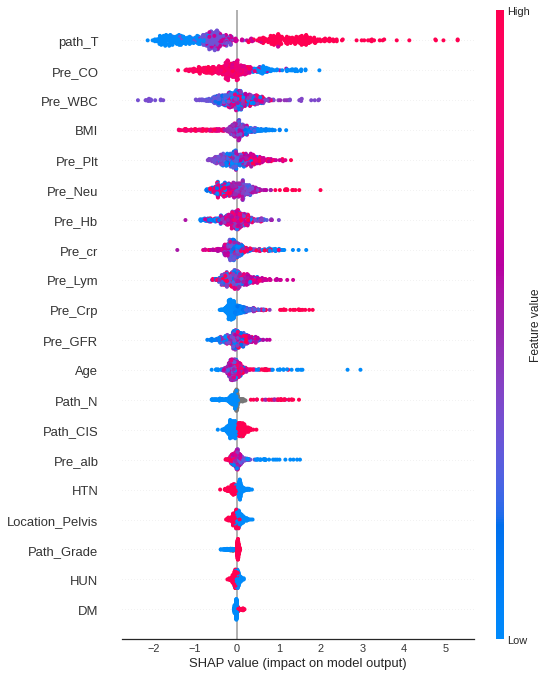

In [ ]:
shap.summary_plot(shap_values, Train)

In [ ]:
X_train

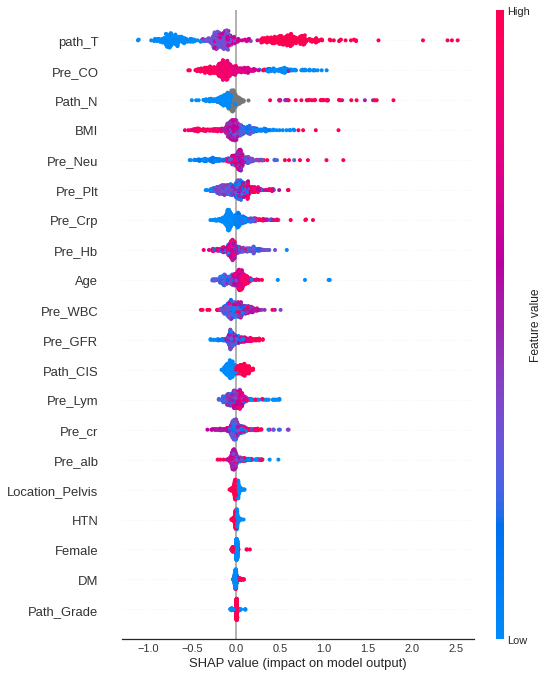

In [ ]:
shap.summary_plot(shap_values, X_train)

In [ ]:
test_explainer = shap.TreeExplainer(xgb_model,X_test)
shap_values = -1 * test_explainer.shap_values(X_test)

`np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
`np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
`np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/

In [ ]:
X_test.iloc[10]

Pre_WBC                5600.000000
Pre_Neu                  44.400000
Pre_Lym                  45.800000
Pre_Plt              252000.000000
Pre_Hb                   17.500000
Pre_Crp                   0.140000
Pre_alb                   4.300000
Pre_cr                    0.950000
Pre_GFR                  80.136538
Pre_CO                   32.100000
Age                      55.000000
Female                    0.000000
BMI                      24.600000
DM                        0.000000
HTN                       0.000000
Location_Pelvis           1.000000
Location_multiple         1.000000
HUN                       0.000000
path_T                    5.000000
Path_N                         NaN
Path_Grade                1.000000
Path_CIS                  0.000000
Name: 150, dtype: float64

In [ ]:
xgb_model.predict(xgb_test)[19]

7.311334

In [ ]:
len(xgb_model.predict(xgb_test)<60)

57

In [ ]:
len(y_test)

57

In [ ]:
mean.iloc[1][60]

array([(False, 31.), (False, 37.), (False, 38.), (False,  0.),
       (False, 31.), (False, 31.), (False, 74.), (False, 45.),
       (False, 60.), (False, 44.), (False, 79.), ( True, 19.),
       (False,  5.), (False,  4.), (False, 54.), (False, 25.),
       (False, 57.), (False, 58.), (False, 32.), (False, 72.),
       ( True,  4.), (False, 61.), (False, 28.), (False, 51.),
       (False,  7.), (False, 85.), (False, 32.), ( True, 26.),
       (False, 48.), ( True,  2.), (False, 16.), ( True, 11.),
       (False, 33.), (False, 31.), (False, 17.), (False, 61.),
       (False,  6.), (False,  0.), (False, 67.), ( True,  3.),
       (False, 47.), (False, 26.), ( True,  6.), ( True, 50.),
       (False, 52.), (False, 54.), (False, 56.), (False, 72.),
       ( True, 10.), (False, 83.), ( True, 12.), (False, 41.),
       (False, 37.), (False, 70.), (False,  8.), (False, 46.),
       (False, 32.), ( True,  0.), ( True,  8.), (False, 86.),
       (False, 96.), (False, 67.), (False, 44.)],
     

In [ ]:
cph.summary[cph.summary['p']<0.05]

,coef,exp(coef),se(coef),coef lower 95%,coef upper 95%,exp(coef) lower 95%,exp(coef) upper 95%,cmp to,z,p,-log2(p)
covariate,,,,,,,,,,,
Pre_Crp,0.136377,1.146113,0.039613,0.058736,0.214018,1.060495,1.238644,0.0,3.442688,5.759644e-04,10.761733
Pre_alb,0.314839,1.370039,0.121265,0.077165,0.552513,1.080220,1.737615,0.0,2.596297,9.423451e-03,6.729529
path_T,0.545192,1.724940,0.147342,0.256407,0.833977,1.292279,2.302457,0.0,3.700183,2.154437e-04,12.180402
Path_N,0.826443,2.285176,0.165317,0.502427,1.150459,1.652728,3.159642,0.0,4.999135,5.758814e-07,20.727725


In [ ]:
anal.loc[train_idx]

,Pre_WBC,Pre_Neu,Pre_Lym,Pre_Plt,Pre_Hb,Pre_Crp,Pre_alb,Pre_cr,Pre_GFR,Pre_CO,...,HTN,Location_Pelvis,Location_multiple,HUN,path_T,Path_N,Path_Grade,Path_CIS,Prg,PFS
227,5500.0,50.1,37.3,220000.0,11.3,0.94,3.3,0.82,48.596056,28.9,...,0,1,2,1,5,0.0,1.0,0.0,0.0,79.0
35,6600.0,74.0,19.2,324000.0,9.9,0.30,3.5,0.90,50.777863,23.5,...,1,0,1,1,3,NaN,1.0,0.0,0.0,54.0
213,6400.0,59.0,26.9,157000.0,12.1,1.54,3.6,1.48,111.572372,27.3,...,0,1,1,0,5,NaN,1.0,1.0,0.0,78.0
531,5500.0,68.8,20.5,174000.0,11.7,0.87,3.5,1.22,83.357419,25.6,...,0,1,1,0,2,0.0,0.0,0.0,0.0,43.0
439,7800.0,52.1,31.6,204000.0,14.8,0.36,3.9,0.88,68.230826,0.0,...,0,0,2,1,4,NaN,1.0,1.0,1.0,33.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
538,5000.0,57.6,28.8,203000.0,11.4,0.48,3.7,1.04,57.453038,24.5,...,1,0,1,0,3,0.0,1.0,1.0,0.0,39.0
443,15500.0,74.4,15.1,309000.0,14.4,0.62,4.0,0.98,77.602602,21.9,...,1,0,1,1,3,NaN,1.0,1.0,0.0,53.0
194,5300.0,66.9,23.4,131000.0,13.1,0.10,3.7,1.11,79.106454,23.6,...,1,1,1,0,2,NaN,0.0,0.0,0.0,90.0
301,6700.0,58.5,33.0,278000.0,12.4,0.35,3.9,0.96,74.433628,30.8,...,1,0,1,1,5,NaN,1.0,1.0,1.0,29.0


In [ ]:
anal

,Pre_WBC,Pre_Neu,Pre_Lym,Pre_Plt,Pre_Hb,Pre_Crp,Pre_alb,Pre_cr,Pre_GFR,Pre_CO,...,HTN,Location_Pelvis,Location_multiple,HUN,path_T,Path_N,Path_Grade,Path_CIS,Prg,PFS
0,6500.0,53.5,31.3,233000.0,15.4,0.10,4.4,1.10,96.106645,25.1,...,0,1,1,1,3,NaN,0.0,0.0,0.0,105.0
1,4100.0,51.1,39.7,234000.0,14.8,0.10,4.5,0.90,80.307387,25.6,...,0,1,1,1,2,NaN,1.0,0.0,0.0,107.0
2,5800.0,57.0,31.6,173000.0,11.9,1.16,4.1,1.10,81.768519,23.4,...,0,0,1,0,4,0.0,0.0,0.0,1.0,3.0
3,8400.0,64.4,28.2,351000.0,11.5,7.77,4.3,2.10,167.463536,25.7,...,1,1,1,0,5,NaN,1.0,0.0,0.0,9.0
4,8500.0,51.3,33.5,230000.0,14.8,0.10,4.3,1.00,78.081601,26.4,...,1,1,1,0,2,NaN,0.0,0.0,0.0,121.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
673,7800.0,66.9,24.3,231000.0,11.4,0.14,3.9,1.02,63.495450,0.0,...,1,1,2,0,5,NaN,NaN,NaN,1.0,6.0
674,7100.0,65.8,22.3,195000.0,10.9,2.18,3.3,1.71,133.519537,23.3,...,1,1,1,0,5,NaN,NaN,NaN,1.0,7.0
675,11200.0,61.9,29.8,337000.0,11.8,0.15,4.3,0.81,46.022233,27.8,...,1,0,1,0,3,NaN,NaN,NaN,0.0,18.0
676,6100.0,64.4,26.3,236000.0,13.7,0.19,3.9,1.55,128.022534,24.7,...,0,0,1,1,4,NaN,NaN,NaN,1.0,0.0


In [ ]:
dist_calibration_score(y_test, mean, returns="all")

{'statistic': 9.298138638217514,
 'pval': 0.4102210287441247,
 'max_deviation': 0.9597088867578276,
 'histogram': bin
 (-0.001, 0.1]     6.308256
 (0.1, 0.2]        6.308256
 (0.2, 0.3]        6.308256
 (0.3, 0.4]        6.308256
 (0.4, 0.5]        6.246067
 (0.5, 0.6]        6.866434
 (0.6, 0.7]        6.102526
 (0.7, 0.8]       12.346166
 (0.8, 0.9]        3.882671
 (0.9, 1.0]        2.323111
 dtype: float64}

In [ ]:
mean

,0,2,4,6,8,10,12,14,16,18,...,110,112,114,116,118,120,122,124,126,128
0,1.0,0.959184,0.897959,0.856657,0.835763,0.770822,0.748798,0.703417,0.703417,0.703417,...,0.512298,0.512298,0.512298,0.512298,0.512298,0.512298,0.512298,0.512298,0.512298,0.512298
1,1.0,1.000000,0.979592,0.979592,0.979592,0.979592,0.979592,0.979592,0.979592,0.979592,...,0.925421,0.925421,0.925421,0.925421,0.925421,0.925421,0.925421,0.925421,0.925421,0.925421
2,1.0,0.960000,0.840000,0.780000,0.780000,0.759474,0.738377,0.716660,0.694943,0.694943,...,0.599389,0.599389,0.599389,0.599389,0.599389,0.599389,0.599389,0.599389,0.599389,0.599389
3,1.0,1.000000,0.979592,0.979592,0.915705,0.915705,0.915705,0.915705,0.892226,0.892226,...,0.646095,0.646095,0.646095,0.646095,0.646095,0.646095,0.646095,0.646095,0.646095,0.646095
4,1.0,1.000000,0.933333,0.933333,0.910569,0.910569,0.863873,0.840525,0.840525,0.840525,...,0.715863,0.715863,0.715863,0.715863,0.715863,0.715863,0.715863,0.715863,0.715863,0.715863
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58,1.0,0.937500,0.833333,0.769737,0.748355,0.726974,0.704944,0.682204,0.659464,0.659464,...,0.576371,0.576371,0.576371,0.576371,0.576371,0.576371,0.576371,0.576371,0.576371,0.576371
59,1.0,1.000000,1.000000,0.977778,0.955039,0.955039,0.955039,0.931745,0.931745,0.931745,...,0.897236,0.897236,0.897236,0.897236,0.897236,0.897236,0.897236,0.897236,0.897236,0.897236
60,1.0,0.980000,0.959583,0.959583,0.877917,0.837083,0.837083,0.837083,0.837083,0.837083,...,0.700438,0.700438,0.700438,0.700438,0.700438,0.700438,0.700438,0.700438,0.700438,0.700438
61,1.0,1.000000,1.000000,1.000000,0.978723,0.978723,0.978723,0.978723,0.978723,0.978723,...,0.856383,0.856383,0.856383,0.856383,0.856383,0.856383,0.856383,0.856383,0.856383,0.856383


In [ ]:
import shap

# load JS visualization code to notebook
shap.initjs()

ValueError: ignored

In [ ]:
def plot_ci(mean, upper_ci, lower_ci, i=42, title='Probability of survival $P(T \geq t)$'):
    
    # plotting mean and confidence intervals
    plt.figure(figsize=(12, 4), dpi=120)
    plt.plot(mean.columns,mean.iloc[i])
    plt.fill_between(mean.columns, lower_ci.iloc[i], upper_ci.iloc[i], alpha=0.2)

    plt.title(title)
    plt.xlabel('Time [days]')
    plt.ylabel('Probability')
    plt.tight_layout()

<>:1: DeprecationWarning:

invalid escape sequence \g

<>:1: DeprecationWarning:

invalid escape sequence \g

<>:1: DeprecationWarning:

invalid escape sequence \g

<ipython-input-111-046dd3d0bc9c>:1: DeprecationWarning:

invalid escape sequence \g



In [ ]:
X = anal[['Pre_WBC', 'Pre_Neu', 'Pre_Lym', 'Pre_Plt', 'Pre_Hb', 'Pre_Crp',
       'Pre_alb', 'Pre_cr', 'Pre_GFR', 'Pre_CO', 'Age', 'Female', 'BMI', 'DM',
       'HTN', 'Location_Pelvis', 'Location_multiple', 'HUN', 'path_T', 'Path_N',
       'Path_Grade', 'Path_CIS']]
E = anal[['Prg']]
T = anal[['PFS']]


In [ ]:
weight = len(E[E==0])/ len(E[E==1])

In [ ]:
AFT_data = anal

In [ ]:
AFT_data['Survival_label_lower_bound'] = AFT_data ['PFS']
AFT_data['Survival_label_upper_bound'] = AFT_data ['PFS']

In [ ]:
AFT_data['Survival_label_upper_bound'] = AFT_data.apply(lambda x: x['PFS'] if x['Prg']==1 else np.inf, axis=1)

In [ ]:
y_lower_bound = AFT_data['Survival_label_lower_bound']
y_upper_bound = AFT_data['Survival_label_upper_bound']

In [ ]:
X = AFT_data.drop(['PFS','Prg','Survival_label_lower_bound', 'Survival_label_upper_bound'], axis=1)

In [ ]:
AFT_data_forsplit = AFT_data.drop(['PFS','Prg'], axis=1)

In [ ]:
# X = ['Pre_WBC', 'Pre_Neu', 'Pre_Lym', 'Pre_Plt', 'Pre_Hb', 'Pre_Crp',
#        'Pre_alb', 'Pre_cr', 'Pre_GFR', 'Pre_CO', 'Age', 'Female', 'BMI', 'DM',
#        'HTN', 'Location_Pelvis', 'Location_multiple', 'HUN', 'path_T', 'Path_N',
#        'Path_Grade', 'Path_CIS']
# E = ['Prg']
# T = ['PFS']
# a , c = train_test_split(anal, test_size=0.1, random_state=7)
# a , b = train_test_split(a, test_size=0.1, random_state=7)


In [ ]:
Train , Test = train_test_split(X, test_size=0.1, random_state=7)
Train , Valid = train_test_split(Train, test_size=0.1, random_state=7)

In [ ]:
dtrain = xgb.DMatrix(Train)
dtrain.set_float_info('label_lower_bound', y_lower_bound[Train.index])
dtrain.set_float_info('label_upper_bound', y_upper_bound[Train.index])

In [ ]:
dvalid = xgb.DMatrix(Valid)
dvalid.set_float_info('label_lower_bound', y_lower_bound[Valid.index])
dvalid.set_float_info('label_upper_bound', y_upper_bound[Valid.index])

dtest = xgb.DMatrix(Test)
dtest.set_float_info('label_lower_bound', y_lower_bound[Test.index])
dtest.set_float_info('label_upper_bound', y_upper_bound[Test.index])

In [ ]:
# from xgbse.converters import build_xgb_aft_dmatrix

# aft_train = build_xgb_aft_dmatrix(a[X],a[T],a[E])
# aft_vaild = build_xgb_aft_dmatrix(b[X],b[T],b[E])
# aft_test = build_xgb_aft_dmatrix(c[X],c[T],c[E])

In [ ]:
# PARAMS_XGB_AFT = {
#     'objective': 'survival:aft',
#     'eval_metric': 'aft-nloglik',
#     'aft_loss_distribution': 'extreme',
#     'aft_loss_distribution_scale': 0.7,
#     'tree_method': 'hist', 
#     'learning_rate': 5e-2, 
#     'max_depth': 10, 
#     'booster':'gbtree',
#     'min_child_weight': 5
# }

In [ ]:
from lifelines.utils import concordance_index as cindex


In [ ]:
base_params = {'verbosity': 0,
              'objective': 'survival:aft',
              'eval_metric': 'aft-nloglik',
              'tree_method': 'hist',
              'booster': 'gbtree',
              'scale_pos_weight': weight
              }  # Hyperparameters common to all trials


def objective(trial):
    params = {'learning_rate': trial.suggest_loguniform('learning_rate', 0.001, 0.2),
              'aft_loss_distribution': trial.suggest_categorical('aft_loss_distribution',
                                                                  ['normal', 'logistic', 'extreme']),
              'aft_loss_distribution_scale': trial.suggest_loguniform('aft_loss_distribution_scale', 0.6,1.5),
              'max_depth': trial.suggest_int('max_depth', 3, 20),
              'lambda': trial.suggest_loguniform('lambda', 1e-1, 1.0),
              'alpha': trial.suggest_loguniform('alpha', 1e-1, 1.0),
              'min_child_weight': trial.suggest_loguniform('min_child_weight', 1, 10),
              # 'colsample_bynode':trial.suggest_loguniform('colsample_bynode', 0.7, 1),
              # 'colsample_bytree':trial.suggest_loguniform('colsample_bytree', 0.7, 1),
              # 'colsample_bylevel':trial.suggest_loguniform('colsample_bylevel', 0.7, 1),
              # 'booster':trial.suggest_categorical('booster',
              #                                     ['gbtree', 'dart'])
              }  # Search space

    params.update(base_params)
    pruning_callback = optuna.integration.XGBoostPruningCallback(trial, 'valid-aft-nloglik')
    bst = xgb.train(params, xgb_train, num_boost_round=500,
                    evals=[(xgb_train, 'train'), (xgb_test, 'valid')], 
                    early_stopping_rounds=30, verbose_eval=False, callbacks=[pruning_callback])
    
    if bst.best_iteration >= 25:
        return bst.best_score
    else:
        return np.inf  # Reject models with < 25 trees

In [ ]:

# Run hyperparameter search
study = optuna.create_study(direction='minimize')
study.optimize(objective, n_trials=1000, timeout=60)
print('Completed hyperparameter tuning with best aft-nloglik = {}.'.format(study.best_trial.value))
params = {}
params.update(base_params)
params.update(study.best_trial.params)


[I 2022-08-24 10:55:37,274] A new study created in memory with name: no-name-38f47115-4e34-4bae-b0b1-bebaa5925025
[W 2022-08-24 10:55:37,280] Trial 0 failed because of the following error: TypeError("cv() got an unexpected keyword argument 'evals'")
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/optuna/study/_optimize.py", line 213, in _run_trial
    value_or_values = func(trial)
  File "<ipython-input-169-a7968401a244>", line 30, in objective
    early_stopping_rounds=30, verbose_eval=False, callbacks=[pruning_callback])
TypeError: cv() got an unexpected keyword argument 'evals'


TypeError: ignored

In [ ]:
fig = optuna.visualization.plot_optimization_history(study)
fig.show()

In [ ]:
plot_parallel_coordinate(study)
plot_intermediate_values(study)

In [ ]:
plot_parallel_coordinate(study)

In [ ]:
PARAMS_XGB_AFT = {
    'objective': 'survival:aft',
    'eval_metric': 'aft-nloglik',
    'aft_loss_distribution': 'extreme',
    'aft_loss_distribution_scale': 0.8,
    'tree_method': 'hist', 
    'learning_rate': 5e-2, 
    'max_depth': 10, 
    'booster':'gbtree',
    'min_child_weight': 5
}

In [ ]:
# Re-run training with the best hyperparameter combination
print('Re-running the best trial... params = {}'.format(params))

xgb_model = xgb.train(
            params,
            dtrain,
            # maximize=True,
            num_boost_round=100000,
            early_stopping_rounds=100,
            evals=[(dvalid, 'val')],
            verbose_eval=10
)

# predicting and evaluating
preds = xgb_model.predict(dtest).astype(float)
T = AFT_data['PFS'][Test.index]
E = AFT_data['Prg'][Test.index]
cind = cindex(T, preds , E)
print(f"C-index: {cind:.3f}")
print(f"Average survival time: {preds.mean():.0f} Months")

Re-running the best trial... params = {'verbosity': 0, 'objective': 'survival:aft', 'eval_metric': 'aft-nloglik', 'tree_method': 'hist', 'booster': 'gbtree', 'scale_pos_weight': 1.0, 'learning_rate': 0.16821591124980378, 'aft_loss_distribution': 'logistic', 'aft_loss_distribution_scale': 0.9154802252773994, 'max_depth': 16, 'lambda': 0.12700388001101773, 'alpha': 0.1235716359538127, 'min_child_weight': 2.6303170050357916}


AttributeError: ignored

In [ ]:
preds

array([1.67037033e+02, 1.11824414e+03, 1.35842957e+02, 2.14356796e+02,
       8.73985748e+01, 5.75814414e+04, 3.79543848e+03, 7.82561768e+02,
       3.97683423e+03, 6.66293945e+01, 2.77020679e+03, 6.76906250e+02,
       5.88198608e+02, 1.44813644e+02, 2.82829865e+02, 1.71187891e+03,
       7.33478165e+01, 4.87039600e+03, 1.46985864e+03, 2.25696320e+02,
       4.01982403e+00, 1.69392395e+02, 7.08915894e+02, 4.02989478e+03,
       5.83735107e+03, 1.82647266e+03, 1.42321136e+02, 7.58255920e+01,
       1.64079785e+03, 7.56601048e+00, 1.03062782e+02, 1.13121147e+02,
       4.15251526e+02, 7.10916519e+01, 7.87131287e+02, 5.02464203e+02,
       9.63807449e+01, 1.92677174e+01, 7.41418945e+02, 1.25749052e+00,
       2.26107483e+02, 4.87814026e+02, 3.46991768e+01, 2.50612198e+02,
       1.18158676e+02, 4.05159790e+03, 1.40670967e+04, 1.06034192e+03,
       9.07385445e+00, 1.09663896e+04, 7.54535217e+01, 1.11721985e+03,
       7.38291645e+00, 3.72751694e+01, 1.34720793e+01, 3.50748608e+03,
      

In [ ]:
preds_2 = xgb_model.predict(dtrain).astype(float)
T_2 = AFT_data['PFS'][Train.index]
E_2 = AFT_data['Prg'][Train.index]
cind_2 = cindex(T_2, preds_2, E_2)

preds_3 = xgb_model.predict(dvalid).astype(float)
T_3 = AFT_data['PFS'][Valid.index]
E_3 = AFT_data['Prg'][Valid.index]
cind_3 = cindex(T_3, preds_3, E_3)

print (cind_2, cind_3)

0.9950160801940907 0.6976127320954907


In [ ]:
import shap

# load JS visualization code to notebook
shap.initjs()

In [ ]:
explainer = shap.TreeExplainer(xgb_model,Train)
shap_values = -1 * explainer.shap_values(Train)

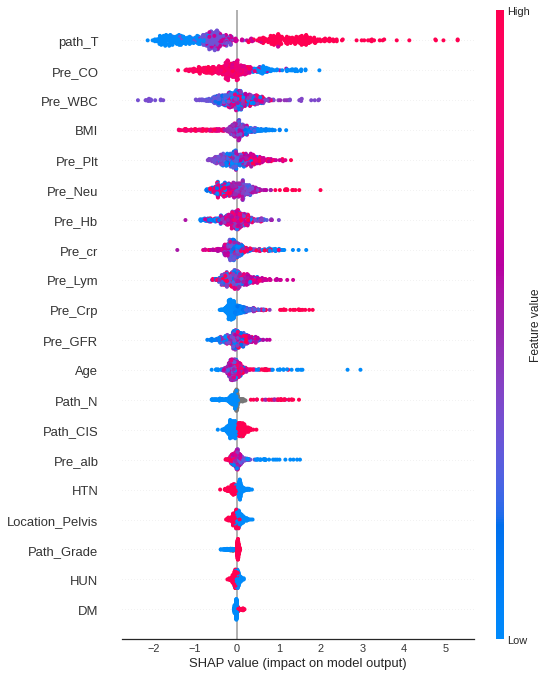

In [ ]:
shap.summary_plot(shap_values, Train)

In [ ]:
test_explainer = shap.TreeExplainer(xgb_model,Test)
shap_values = -1 * test_explainer.shap_values(Test)

/usr/local/lib/python3.7/dist-packages/shap/maskers/_tabular.py:82: DeprecationWarning:

`np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations

/usr/local/lib/python3.7/dist-packages/shap/explainers/_tree.py:1511: DeprecationWarning:

`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecation

In [ ]:
preds

array([1.67037033e+02, 1.11824414e+03, 1.35842957e+02, 2.14356796e+02,
       8.73985748e+01, 5.75814414e+04, 3.79543848e+03, 7.82561768e+02,
       3.97683423e+03, 6.66293945e+01, 2.77020679e+03, 6.76906250e+02,
       5.88198608e+02, 1.44813644e+02, 2.82829865e+02, 1.71187891e+03,
       7.33478165e+01, 4.87039600e+03, 1.46985864e+03, 2.25696320e+02,
       4.01982403e+00, 1.69392395e+02, 7.08915894e+02, 4.02989478e+03,
       5.83735107e+03, 1.82647266e+03, 1.42321136e+02, 7.58255920e+01,
       1.64079785e+03, 7.56601048e+00, 1.03062782e+02, 1.13121147e+02,
       4.15251526e+02, 7.10916519e+01, 7.87131287e+02, 5.02464203e+02,
       9.63807449e+01, 1.92677174e+01, 7.41418945e+02, 1.25749052e+00,
       2.26107483e+02, 4.87814026e+02, 3.46991768e+01, 2.50612198e+02,
       1.18158676e+02, 4.05159790e+03, 1.40670967e+04, 1.06034192e+03,
       9.07385445e+00, 1.09663896e+04, 7.54535217e+01, 1.11721985e+03,
       7.38291645e+00, 3.72751694e+01, 1.34720793e+01, 3.50748608e+03,
      

In [ ]:
Test.iloc[11]

Pre_WBC                6500.000000
Pre_Neu                  61.900000
Pre_Lym                  27.800000
Pre_Plt              221000.000000
Pre_Hb                   10.100000
Pre_Crp                   0.100000
Pre_alb                   3.700000
Pre_cr                    0.710000
Pre_GFR                  47.748425
Pre_CO                   21.600000
Age                      47.000000
Female                    1.000000
BMI                      18.700000
DM                        0.000000
HTN                       1.000000
Location_Pelvis           1.000000
Location_multiple         1.000000
HUN                       0.000000
path_T                    5.000000
Path_N                    0.000000
Path_Grade                1.000000
Path_CIS                  0.000000
Name: 630, dtype: float64

In [ ]:
preds[11]

676.90625

In [ ]:
y_test[11]

(True, 19.)

In [ ]:
temp1 = pd.concat([E,T],axis=1)
temp2 = pd.Series(preds, index=Test.index)
table = pd.concat([temp1,temp2],axis=1)

In [ ]:
table[table['Prg']==1]

,Prg,PFS,0
630,1.0,19.0,676.906250
476,1.0,4.0,4.019824
260,1.0,26.0,75.825592
352,1.0,2.0,7.566010
321,1.0,11.0,113.121147
362,1.0,3.0,1.257491
329,1.0,6.0,34.699177
401,1.0,50.0,250.612198
445,1.0,10.0,9.073854
358,1.0,12.0,75.453522


In [ ]:
Test.iloc[11]

Pre_WBC                6500.000000
Pre_Neu                  61.900000
Pre_Lym                  27.800000
Pre_Plt              221000.000000
Pre_Hb                   10.100000
Pre_Crp                   0.100000
Pre_alb                   3.700000
Pre_cr                    0.710000
Pre_GFR                  47.748425
Pre_CO                   21.600000
Age                      47.000000
Female                    1.000000
BMI                      18.700000
DM                        0.000000
HTN                       1.000000
Location_Pelvis           1.000000
Location_multiple         1.000000
HUN                       0.000000
path_T                    5.000000
Path_N                    0.000000
Path_Grade                1.000000
Path_CIS                  0.000000
Name: 630, dtype: float64

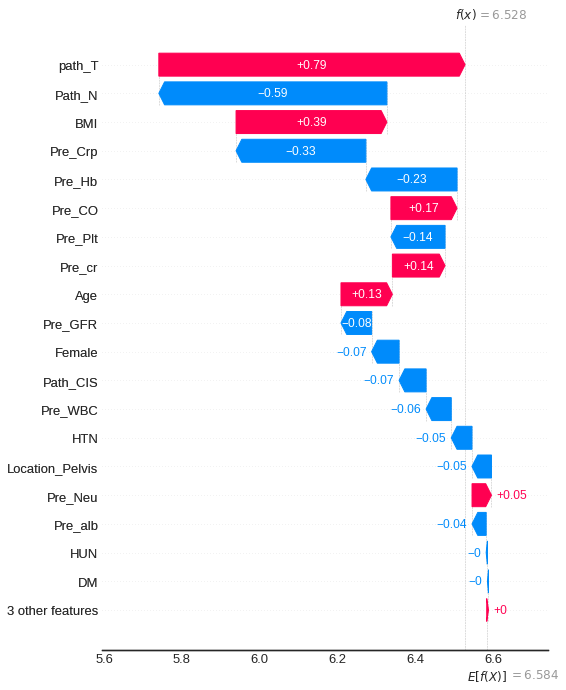

In [ ]:
shap.plots._waterfall.waterfall_legacy(explainer.expected_value, shap_values[11], feature_names=X_test.columns.tolist(), max_display=20)


In [ ]:
preds

array([  32.79802  ,  590.56976  ,   23.55005  ,  121.644356 ,
         27.825132 , 1465.4022   , 1812.6262   ,  200.97206  ,
        786.52234  ,   13.43968  ,  525.001    ,  112.37187  ,
        193.21573  ,   68.63723  ,  209.72328  ,  260.53818  ,
         15.901037 , 1463.981    ,  124.57997  ,  183.46252  ,
          5.924512 ,  209.1697   ,  482.8399   ,  211.0948   ,
        286.3857   ,  417.2057   ,   66.487175 ,   15.204214 ,
        300.7563   ,    3.9696217,  755.7415   ,  114.11715  ,
         36.84688  ,    9.91897  , 1060.2606   ,  243.12207  ,
        570.2765   ,    9.717465 ,  548.14874  ,   11.835421 ,
        294.58493  ,  132.72273  ,    4.53866  ,  140.74113  ,
         19.154442 , 1875.6396   , 1130.394    ,  207.46445  ,
         33.900036 , 1621.6472   ,  270.71188  ,  209.86743  ,
         27.122135 ,   20.630411 ,   19.008272 , 1271.2102   ,
          8.268166 ,  148.90567  ,    3.8555229,  265.8886   ,
        227.59299  , 1767.3799   , 1947.8927   ], dtype

In [ ]:
def convert_y(y):
    """
    Convert structured array y into an array of
    event indicators (E) and time of events (T).
    Args:
        y (structured array(numpy.bool_, numpy.number)): Binary event indicator as first field,
            and time of event or time of censoring as second field.
    Returns:
        T ([np.array, pd.Series]): Time of events
        E ([np.array, pd.Series]): Binary event indicator
    """
    event_field, time_field = y.dtype.names
    return y[event_field], y[time_field]

In [ ]:
E, T = convert_y(y_test)

In [ ]:
preds

array([  32.79802  ,  590.56976  ,   23.55005  ,  121.644356 ,
         27.825132 , 1465.4022   , 1812.6262   ,  200.97206  ,
        786.52234  ,   13.43968  ,  525.001    ,  112.37187  ,
        193.21573  ,   68.63723  ,  209.72328  ,  260.53818  ,
         15.901037 , 1463.981    ,  124.57997  ,  183.46252  ,
          5.924512 ,  209.1697   ,  482.8399   ,  211.0948   ,
        286.3857   ,  417.2057   ,   66.487175 ,   15.204214 ,
        300.7563   ,    3.9696217,  755.7415   ,  114.11715  ,
         36.84688  ,    9.91897  , 1060.2606   ,  243.12207  ,
        570.2765   ,    9.717465 ,  548.14874  ,   11.835421 ,
        294.58493  ,  132.72273  ,    4.53866  ,  140.74113  ,
         19.154442 , 1875.6396   , 1130.394    ,  207.46445  ,
         33.900036 , 1621.6472   ,  270.71188  ,  209.86743  ,
         27.122135 ,   20.630411 ,   19.008272 , 1271.2102   ,
          8.268166 ,  148.90567  ,    3.8555229,  265.8886   ,
        227.59299  , 1767.3799   , 1947.8927   ], dtype

In [ ]:
E

array([False, False, False, False, False, False, False, False, False,
       False, False,  True, False, False, False, False, False, False,
       False, False,  True, False, False, False, False, False, False,
        True, False,  True, False,  True, False, False, False, False,
       False, False, False,  True, False, False,  True,  True, False,
       False, False, False,  True, False,  True, False, False, False,
       False, False, False,  True,  True, False, False, False, False])

In [ ]:
T-preds

array([-1.79801941e+00, -5.53569763e+02,  1.44499493e+01, -1.21644356e+02,
        3.17486763e+00, -1.43440222e+03, -1.73862622e+03, -1.55972061e+02,
       -7.26522339e+02,  3.05603199e+01, -4.46000977e+02, -9.33718719e+01,
       -1.88215729e+02, -6.46372299e+01, -1.55723282e+02, -2.35538177e+02,
        4.10989628e+01, -1.40598096e+03, -9.25799713e+01, -1.11462524e+02,
       -1.92451191e+00, -1.48169693e+02, -4.54839905e+02, -1.60094803e+02,
       -2.79385712e+02, -3.32205688e+02, -3.44871750e+01,  1.07957859e+01,
       -2.52756287e+02, -1.96962166e+00, -7.39741516e+02, -1.03117149e+02,
       -3.84688187e+00,  2.10810299e+01, -1.04326062e+03, -1.82122070e+02,
       -5.64276489e+02, -9.71746540e+00, -4.81148743e+02, -8.83542061e+00,
       -2.47584930e+02, -1.06722733e+02,  1.46133995e+00, -9.07411346e+01,
        3.28455582e+01, -1.82163965e+03, -1.07439404e+03, -1.35464447e+02,
       -2.39000359e+01, -1.53864722e+03, -2.58711884e+02, -1.68867432e+02,
        9.87786484e+00,  

In [ ]:
concordance_index(y_train, - xgb_model.predict(xgb_train), risk_strategy='precomputed')


0.9589027957608018

In [ ]:
concordance_index(y_valid, - xgb_model.predict(xgb_valid), risk_strategy='precomputed')

NameError: ignored

In [ ]:
i = 0

reference = X_test.iloc[i]
reference.name = 'reference'
train_neighs = X_train.loc[neighbors.iloc[i]]

pd.concat([reference.to_frame().T, train_neighs]).reset_index()

In [ ]:
# from xgbse.non_parametric import calculate_kaplan_vectorized

# mean, high, low = calculate_kaplan_vectorized(
#     np.array([y['c2'][neighbors.iloc[i]]]),
#     np.array([y['c1'][neighbors.iloc[i]]]),
#     TIME_BINS
# )

# model_surv = xgb_model.predict(X_test)

# plt.figure(figsize=(12,4), dpi=120)
# plt.plot(model_surv.columns, model_surv.iloc[i])
# plt.plot(mean.columns, mean.iloc[0])
# plt.fill_between(mean.columns, low.iloc[0], high.iloc[0], alpha=0.1, color='red')

In [ ]:
dist_calibration_score(y_test, mean)

In [ ]:
def convert_y(y):
    """
    Convert structured array y into an array of
    event indicators (E) and time of events (T).
    Args:
        y (structured array(numpy.bool_, numpy.number)): Binary event indicator as first field,
            and time of event or time of censoring as second field.
    Returns:
        T ([np.array, pd.Series]): Time of events
        E ([np.array, pd.Series]): Binary event indicator
    """
    event_field, time_field = y.dtype.names
    return y[event_field], y[time_field]
    
events, times = convert_y(y_test)
events = events.astype(bool)

In [ ]:
PARAMS_XGB_AFT = {
    'objective': 'survival:aft',
    'eval_metric': 'aft-nloglik',
    'aft_loss_distribution': 'extreme',
    'aft_loss_distribution_scale': 1.2,
    'tree_method': 'hist', 
    'learning_rate': 5e-2, 
    'max_depth': 10, 
    'booster':'gbtree',
    'min_child_weight': 5
}

In [ ]:
interval_probs = xgbse_model.predict(X_test, return_interval_probs=True)

In [ ]:
interval_probs

In [ ]:
import shap

# load JS visualization code to notebook
shap.initjs()

In [ ]:
X_train

In [ ]:
explainer = shap.KernelExplainer(xgbse_model, X_train)
shap_values = -1 * explainer.shap_values(X_train)

In [ ]:
X_train

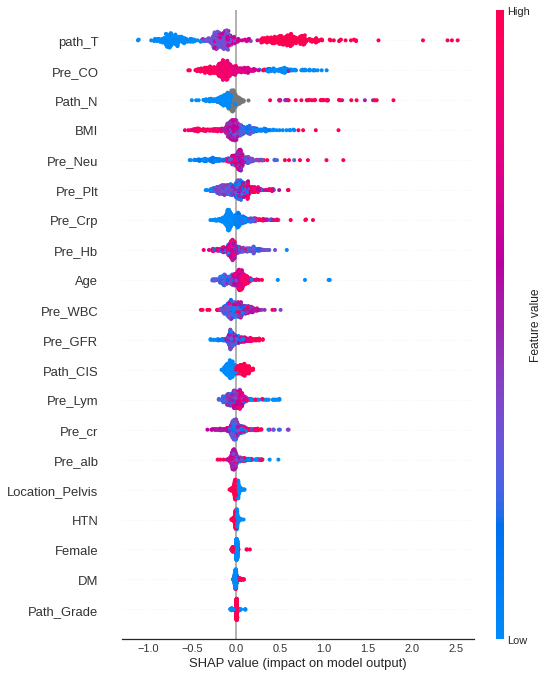

In [ ]:
shap.summary_plot(shap_values, X_train)

In [ ]:
test_explainer = shap.TreeExplainer(xgb_model,X_test)
shap_values = -1 * test_explainer.shap_values(X_test)

`np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
`np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
`np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/

In [ ]:
X_test.iloc[10]

Pre_WBC                5600.000000
Pre_Neu                  44.400000
Pre_Lym                  45.800000
Pre_Plt              252000.000000
Pre_Hb                   17.500000
Pre_Crp                   0.140000
Pre_alb                   4.300000
Pre_cr                    0.950000
Pre_GFR                  80.136538
Pre_CO                   32.100000
Age                      55.000000
Female                    0.000000
BMI                      24.600000
DM                        0.000000
HTN                       0.000000
Location_Pelvis           1.000000
Location_multiple         1.000000
HUN                       0.000000
path_T                    5.000000
Path_N                         NaN
Path_Grade                1.000000
Path_CIS                  0.000000
Name: 150, dtype: float64

In [ ]:
xgb_model.predict(xgb_test)[19]

7.311334

In [ ]:
len(xgb_model.predict(xgb_test)<60)

57

In [ ]:
len(y_test)

57

In [ ]:
y_test[19]

(True, 5.)

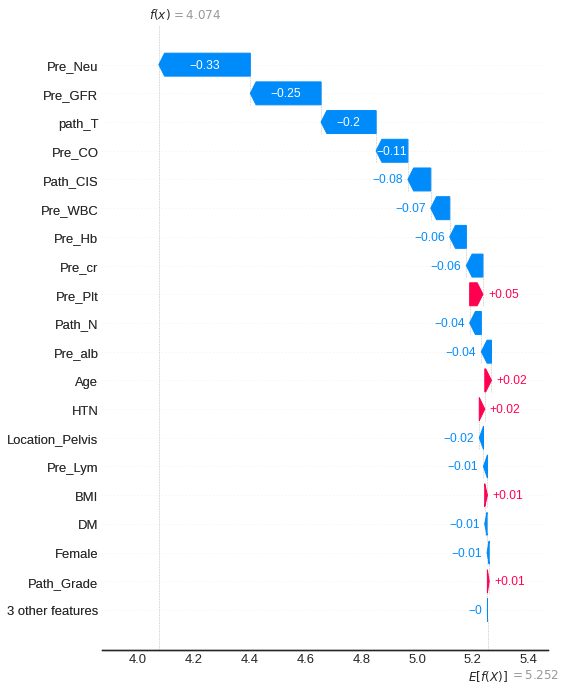

In [ ]:
shap.plots._waterfall.waterfall_legacy(explainer.expected_value, shap_values[11], feature_names=X_test.columns.tolist(), max_display=20)


In [ ]:
plt.style.use(['seaborn-white'])

xgb_model = xgb.XGBClassifier(**params)
xgb_model.fit(X_train, Y_train)
Y_test_proba = xgb_model.predict_proba(X_test)
Y_pred=xgb_model.predict(X_test) 
fpr, tpr, thresholds = roc_curve(Y_test, Y_test_proba[:,1],pos_label=1)
auc = roc_auc_score (Y_test, Y_test_proba[:,1])    
plt.figure(figsize=(8,8))
plt.plot(fpr, tpr, label='30_day in hospital mortality (AUC = %0.3f)' % auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([-0.01, 1.0])
plt.ylim([0.0, 1.01])
plt.xlabel('1-Specificity(False Positive Rate)')
plt.ylabel('Sensitivity(True Positive Rate)')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

NameError: ignored

In [ ]:
table2.to_csv(datapath+'/'+'Table2.csv')

In [ ]:
table2

Missing      Overall
n                                           4680
Age, mean (SD)                    2  54.8 (12.2)
Female, n (%)           0         0  3343 (71.4)
                        1            1337 (28.6)
BMI, mean (SD)                 3017   25.1 (3.4)
Tumorsize, mean (SD)              1    4.7 (3.2)
RvsP, n (%)             0.0       1  2713 (58.0)
                        1.0          1966 (42.0)
Path_T, n (%)           0.0       1      1 (0.0)
                        1.0          2480 (53.0)
                        2.0           897 (19.2)
                        3.0            320 (6.8)
                        4.0            121 (2.6)
                        5.0           693 (14.8)
                        6.0             86 (1.8)
                        7.0             53 (1.1)
                        8.0             28 (0.6)
Path_N, n (%)           0.0    1766  2773 (95.2)
                        1.0            141 (4.8)
Path_M, n (%)           0.0       3  4336 (92.7)
                        1.0            341 (7.3)
FG, n (%)               1.0     154    251 (5.5)
                        2.0          2254 (49.8)
                        3.0          1598 (35.3)
                        4.0            423 (9.3)
Lateralty, n (%)        1.0    1241  1744 (50.7)
                        2.0          1652 (48.0)
                        3.0             43 (1.3)
Perinephric, n (%)      0.0       5  4147 (88.7)
                        1.0           528 (11.3)
Renal_sinus, n (%)      0.0       7  4000 (85.6)
                        1.0           673 (14.4)
LV_emboli, n (%)        0.0       6  4069 (87.1)
                        1.0           605 (12.9)
Adrenal_Inv, n (%)      0.0       6  4296 (91.9)
                        1.0            378 (8.1)
Gerota_Int, n (%)       0.0       9  4630 (99.1)
                        1.0             41 (0.9)
Renal_V_invol, n (%)    0.0      10  4550 (97.4)
                        1.0            120 (2.6)
TumorThrombi, n (%)     0.0       7  4485 (96.0)
                        1.0            188 (4.0)
RV_Thrombi, n (%)       0.0       7  4293 (91.9)
                        1.0            380 (8.1)
IVC_thrombi, n (%)      0.0       6  4585 (98.1)
                        1.0             89 (1.9)
Opmethods_Open, n (%)   0         0  2065 (44.1)
                        1            2615 (55.9)
Opmethods_lapa, n (%)   0         0  3935 (84.1)
                        1             745 (15.9)
Opmethods_HALS, n (%)   0         0  4115 (87.9)
                        1             565 (12.1)
Opmethods_Robot, n (%)  0         0  4087 (87.3)
                        1             593 (12.7)
Path_CCRCC, n (%)       0         0   847 (18.1)
                        1            3833 (81.9)
Path_pRCC, n (%)        0         0  4371 (93.4)
                        1              309 (6.6)
Path_chromophobe, n (%) 0         0  4339 (92.7)
                        1              341 (7.3)
Path_ductal, n (%)      0         0  4667 (99.7)
                        1               13 (0.3)
Path_mixed, n (%)       0         0  4590 (98.1)
                        1               90 (1.9)
Path_sarcomatoid, n (%) 0         0  4640 (99.1)
                        1               40 (0.9)
Path_XP11, n (%)        0         0  4647 (99.3)
                        1               33 (0.7)
Path_cpRCC, n (%)       0         0  4666 (99.7)
                        1               14 (0.3)
CSS, n (%)              0.0       0  4198 (89.7)
                        1.0           482 (10.3)
OS, n (%)               0.0       0  4195 (89.6)
                        1.0           485 (10.4)
Survdate, mean (SD)               0  47.7 (38.7)
MET, n (%)              0.0      35  4013 (86.4)
                        1.0           632 (13.6)
MFS, mean (SD)                    0  40.5 (37.3)
[1] Hartigan's Dip Test reports possible
                                  multimodal distributions for: Age, Tumorsize, Survdate, MFS.
[2] Normality test re

In [ ]:
import shap

# load JS visualization code to notebook
shap.initjs()

In [ ]:
explainer = shap.TreeExplainer(xgb_model)
shap_values = explainer.shap_values(X_train)

In [ ]:
shap.summary_plot(shap_values, X_train)